In [7]:
from google.colab import files
files.upload()

Saving train.csv to train.csv


{'train.csv': b'Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice\n1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkF

In [5]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv("/content/sample_submission.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/sample_submission.csv'

In [9]:
files.upload()

{}

In [10]:
df = pd.read_csv("/content/train.csv")
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [11]:
df = df.drop('Id',axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [12]:
print(df.isna().sum())

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


In [13]:
nan_columns = df.columns[df.isna().any()].tolist()
print(nan_columns)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [14]:
print(df["LotFrontage"].dtype)

float64


In [15]:
# imputation
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
def print_numeric_column(df):
  numeric=[]
  for column in df.columns:
    if df[column].dtype == 'float64' or df[column].dtype == 'int64':
      numeric.append(column)
  return numeric

In [17]:
print(print_numeric_column(df))

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [18]:
numeric_columns = print_numeric_column(df)
df_num = df[numeric_columns].copy() # Ensure df_num is a DataFrame and independent
display(df_num.head())

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [19]:
def replace_nan_with_median(df):
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:
            median_value = df[column].median()
            df[column].fillna(median_value, inplace=True)
    return df


In [20]:
new_df = df_num.copy() # Make a copy to perform imputation on
new_df = replace_nan_with_median(new_df)
print(new_df.isna().sum())
display(new_df.head())

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64


/tmp/ipython-input-2777979619.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_value, inplace=True)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [21]:
variance = pd.DataFrame({
    "variance before imputation": df_num.var(),
    "variance after imputation": new_df.var(),
    "difference": df_num.var() - new_df.var()
})
display(variance)

,variance before imputation,variance after imputation,difference
MSSubClass,1.789338e+03,1.789338e+03,0.000000
LotFrontage,5.897492e+02,4.852186e+02,104.530611
LotArea,9.962565e+07,9.962565e+07,0.000000
OverallQual,1.912679e+00,1.912679e+00,0.000000
OverallCond,1.238322e+00,1.238322e+00,0.000000
YearBuilt,9.122154e+02,9.122154e+02,0.000000
YearRemodAdd,4.262328e+02,4.262328e+02,0.000000
MasVnrArea,3.278497e+04,3.266383e+04,121.141852
BsmtFinSF1,2.080255e+05,2.080255e+05,0.000000
BsmtFinSF2,2.602391e+04,2.602391e+04,0.000000


In [22]:
def compare_kde_all_columns(df1, df2):
    numeric_cols = df1.select_dtypes(include=['int64', 'float64']).columns
    numeric_cols = [col for col in numeric_cols if col in df2.columns]

    for col in numeric_cols:
        plt.figure(figsize=(8, 4))
        sns.kdeplot(df1[col], shade=True, label='DF1')
        sns.kdeplot(df2[col], shade=True, label='DF2')
        plt.title(f"Distribution of {col} (Comparison)")
        plt.xlabel(col)
        plt.ylabel("Density")
        plt.legend()
        plt.show()

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


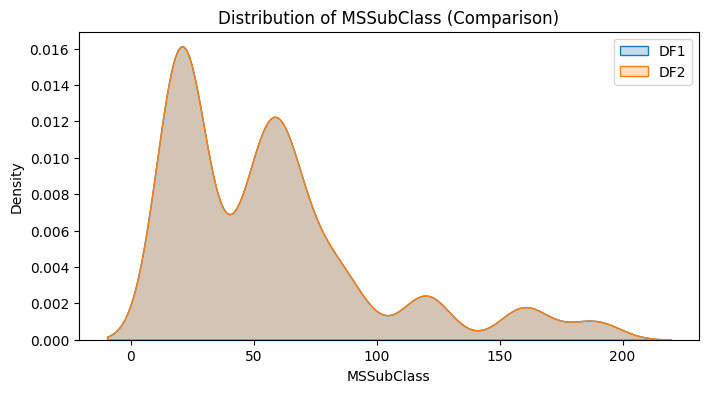

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


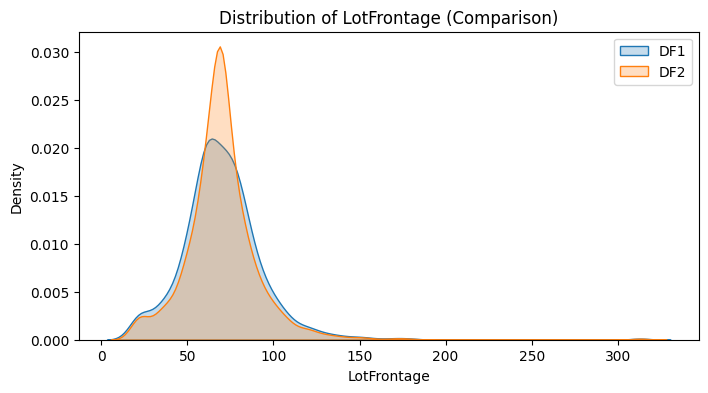

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


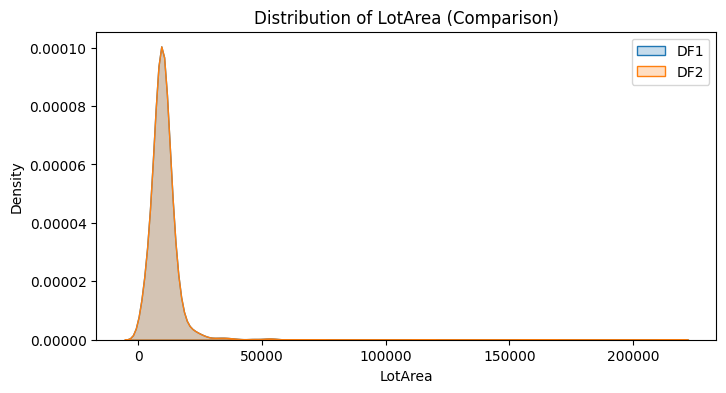

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


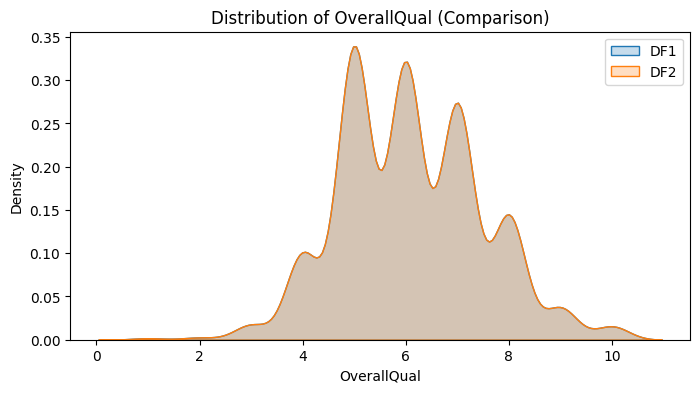

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


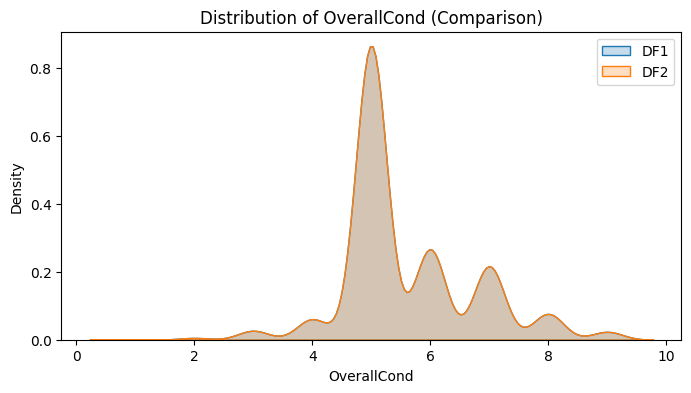

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


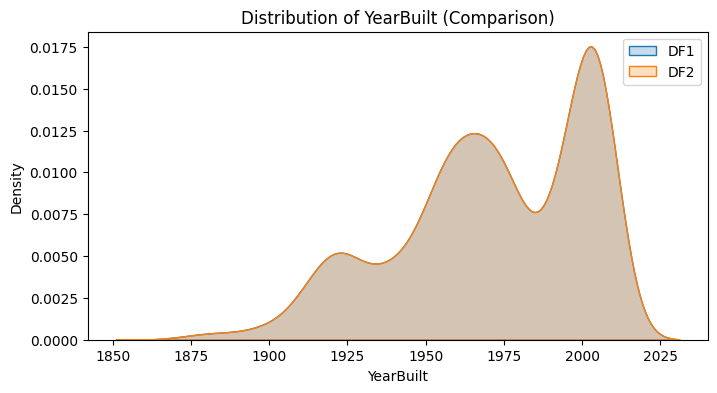

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


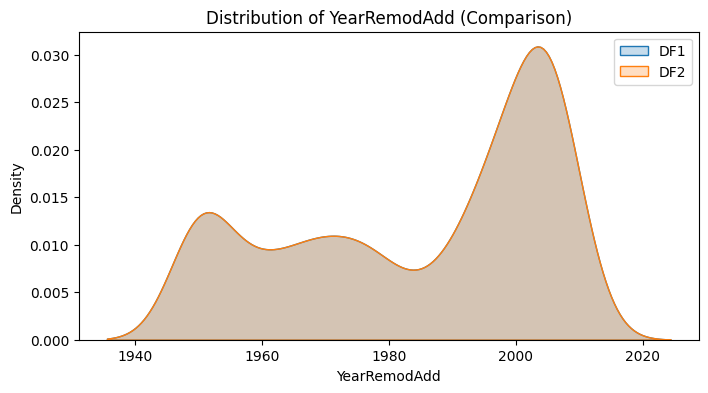

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


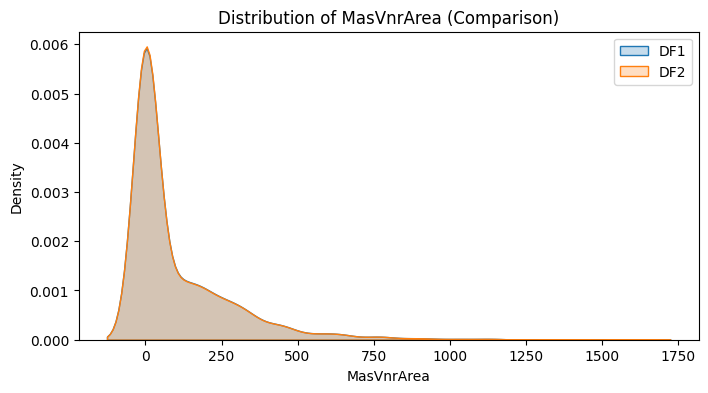

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


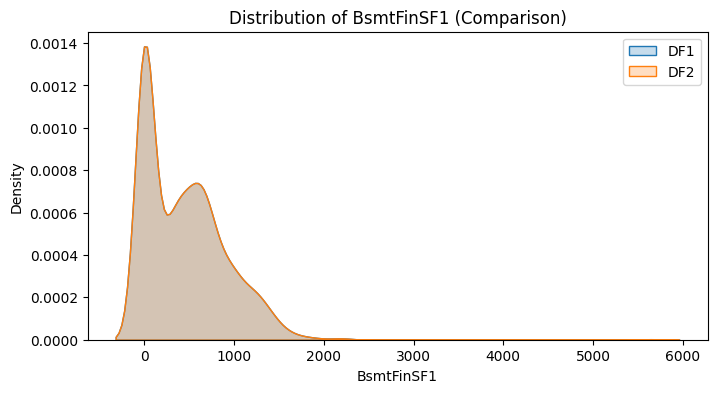

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


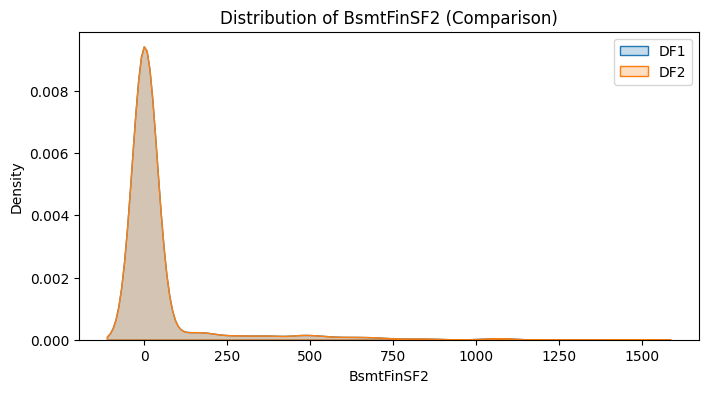

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


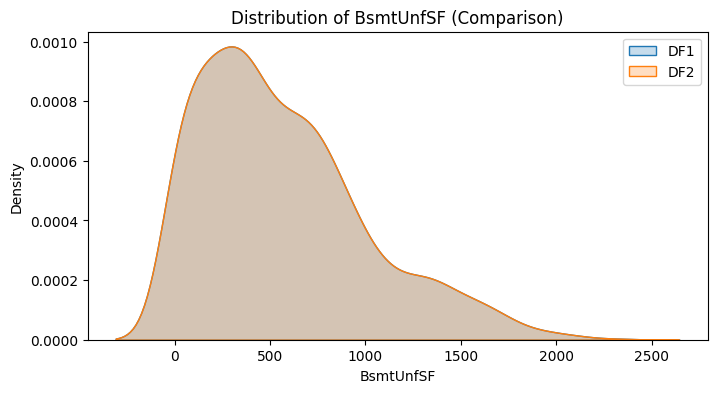

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


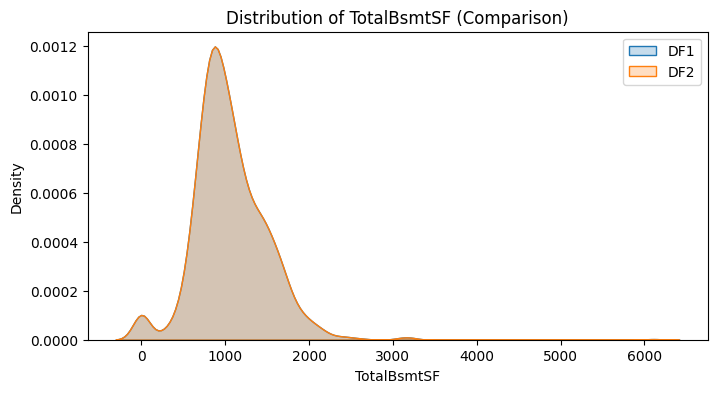

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


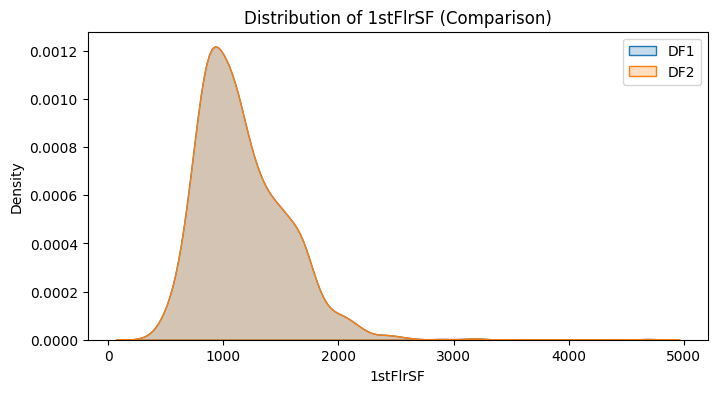

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


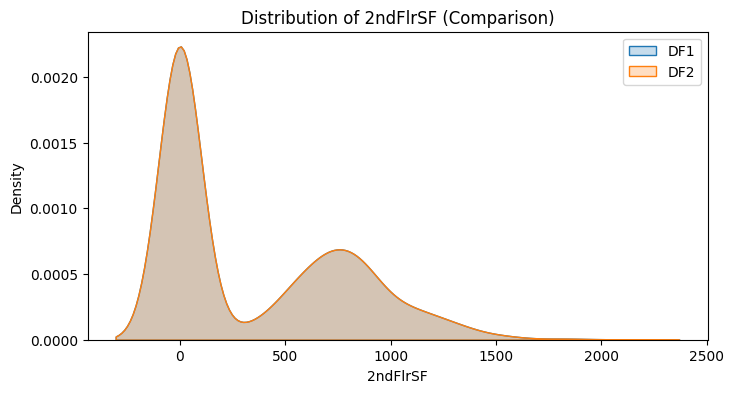

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


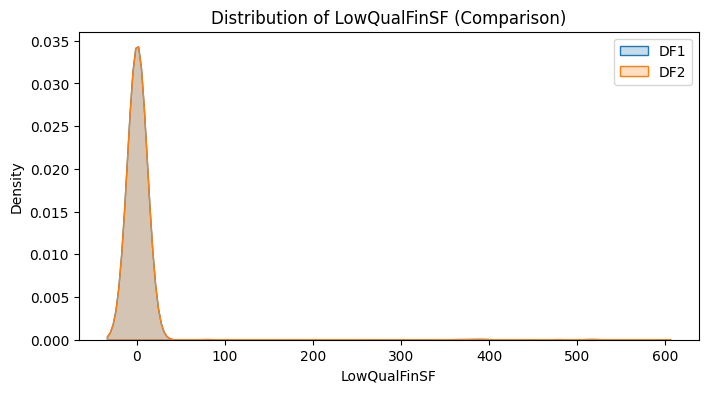

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


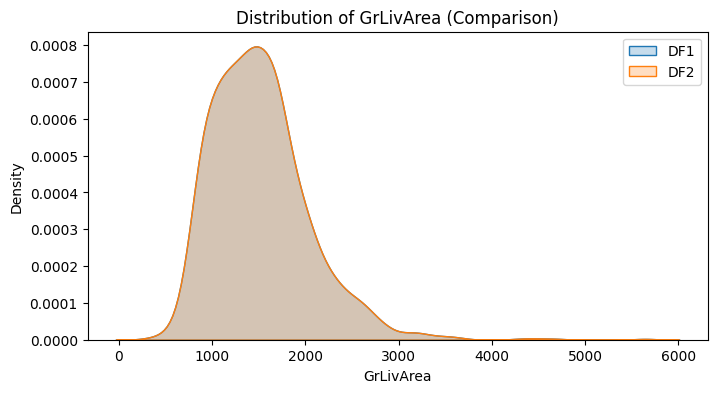

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


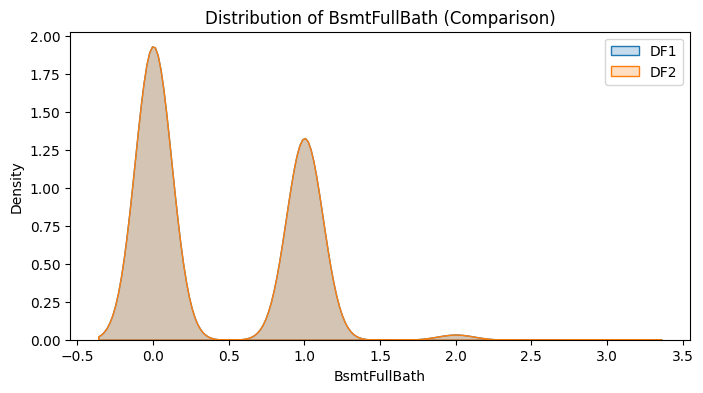

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


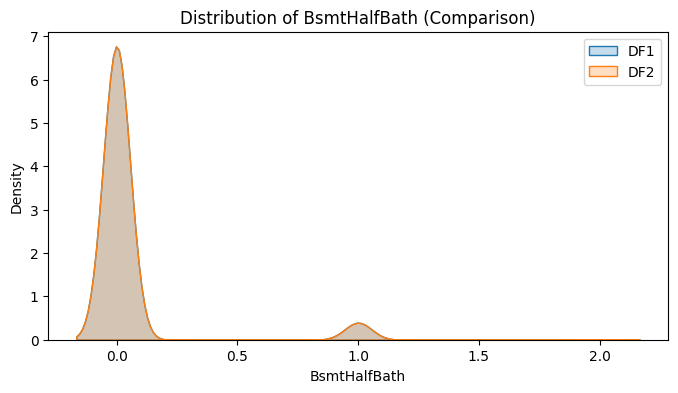

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


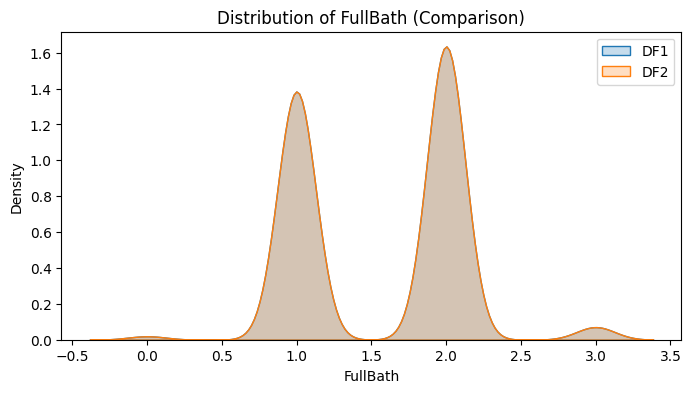

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


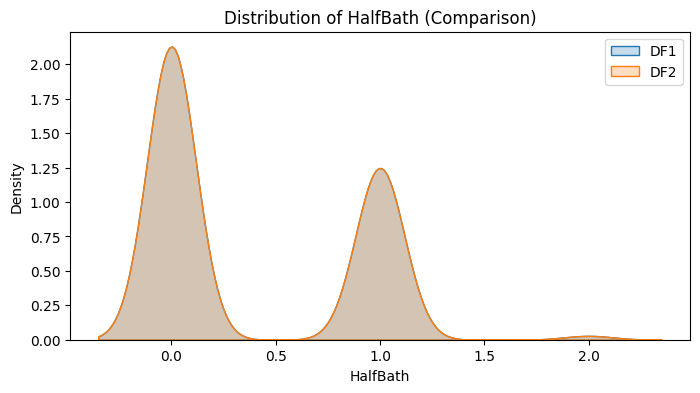

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


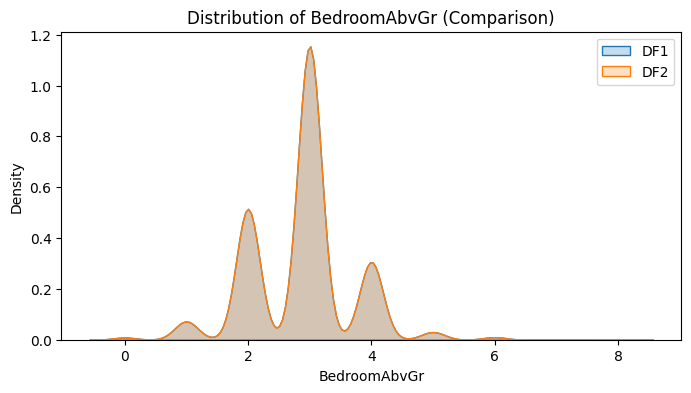

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


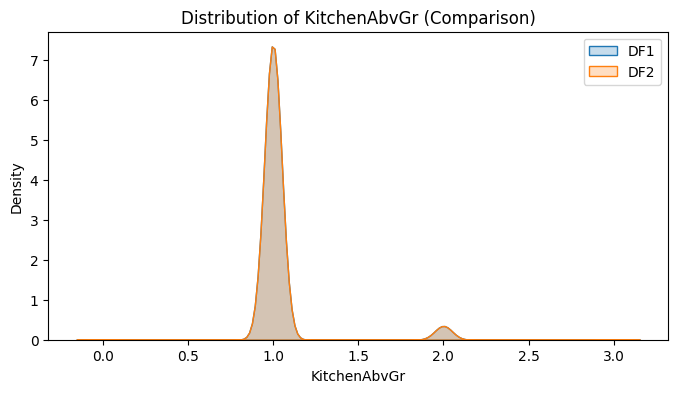

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


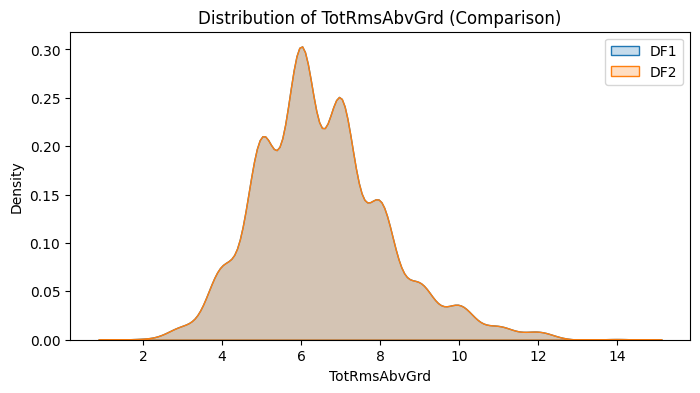

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


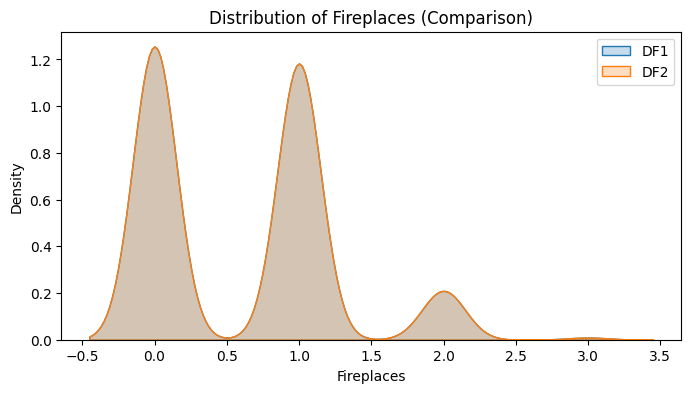

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


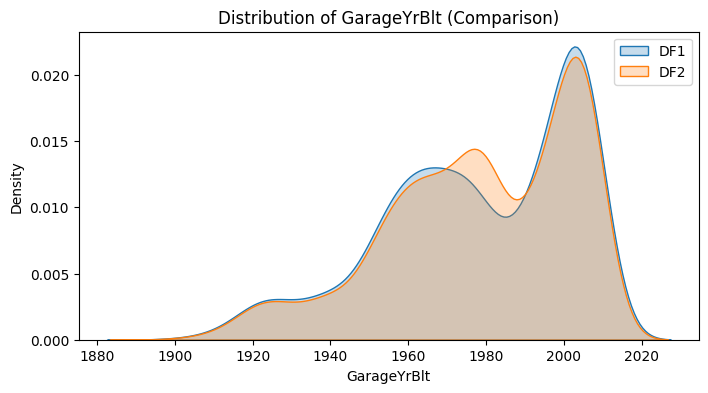

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


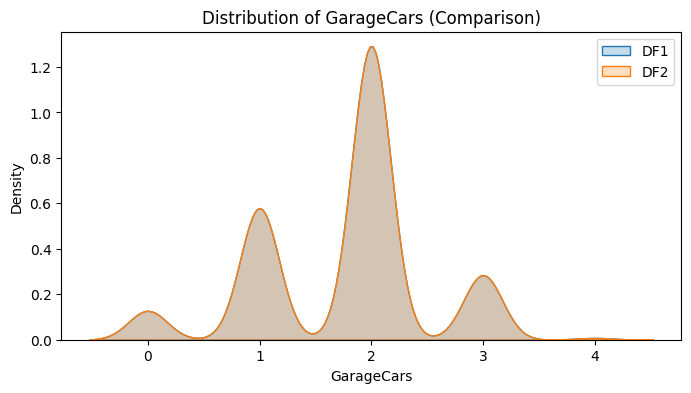

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


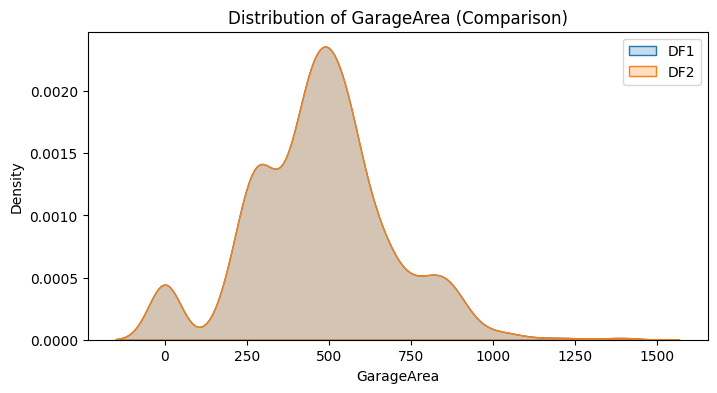

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


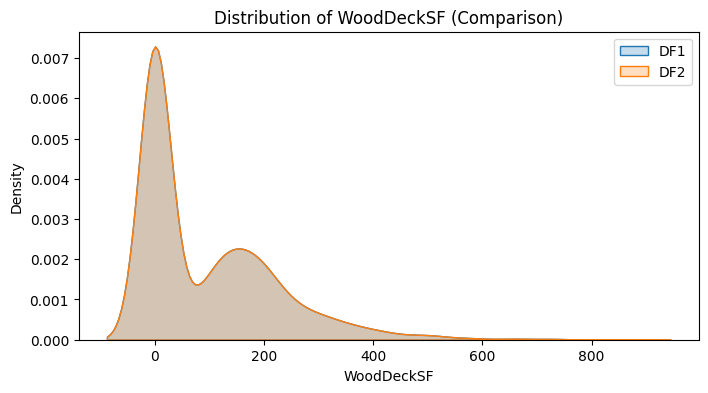

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


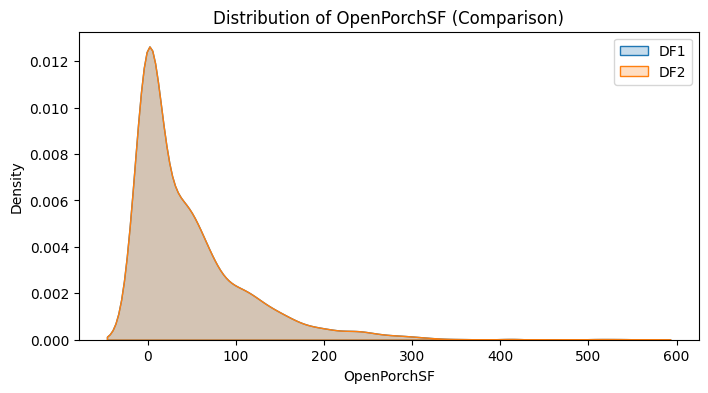

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


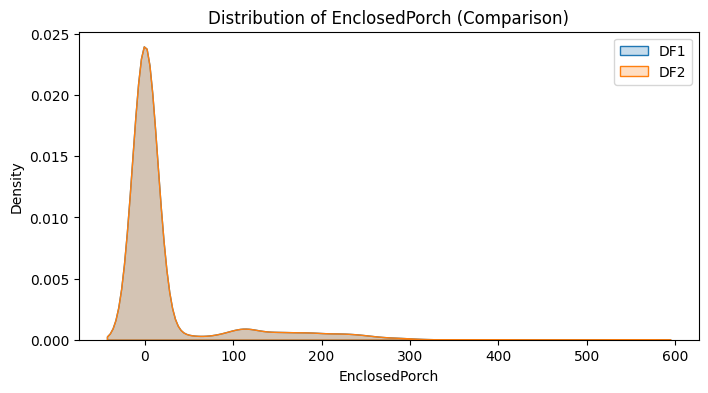

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


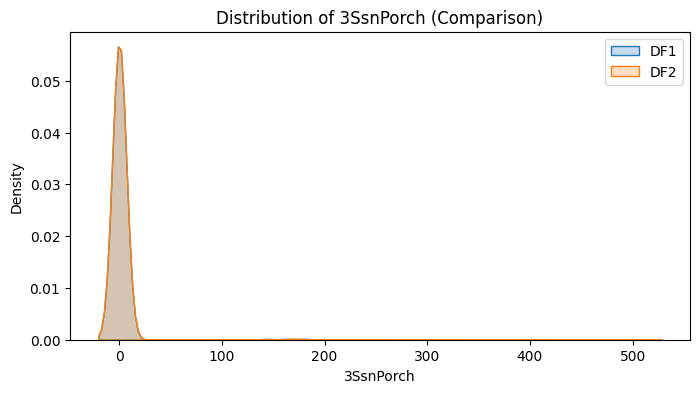

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


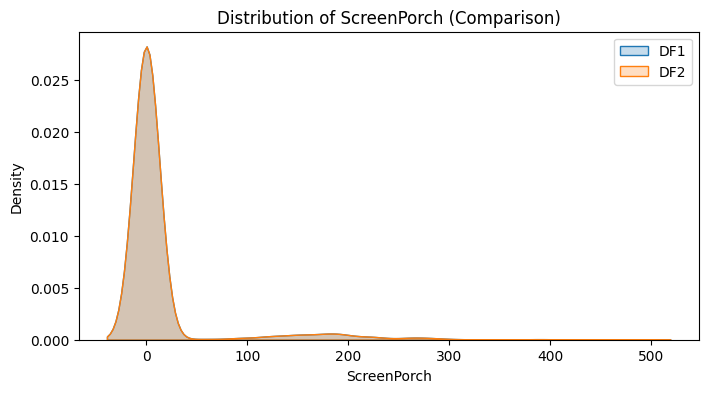

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


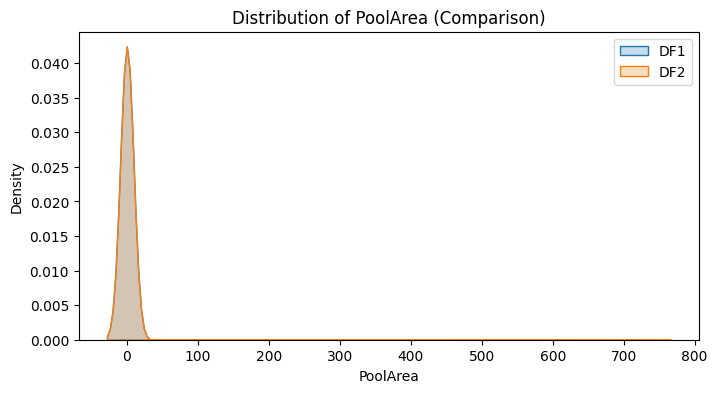

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


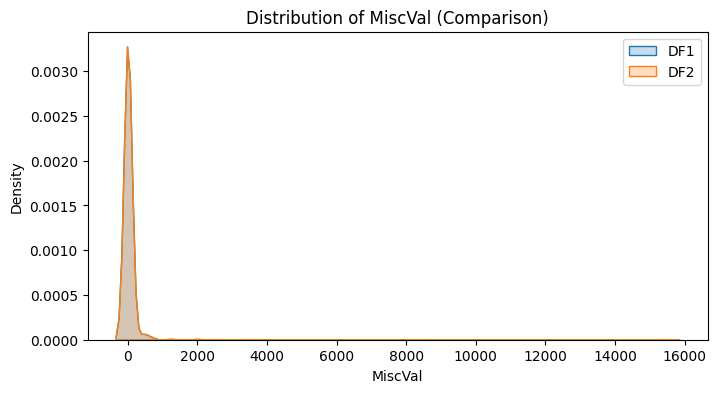

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


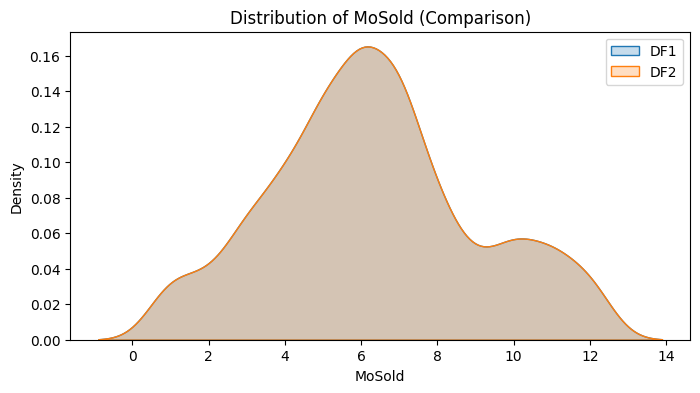

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


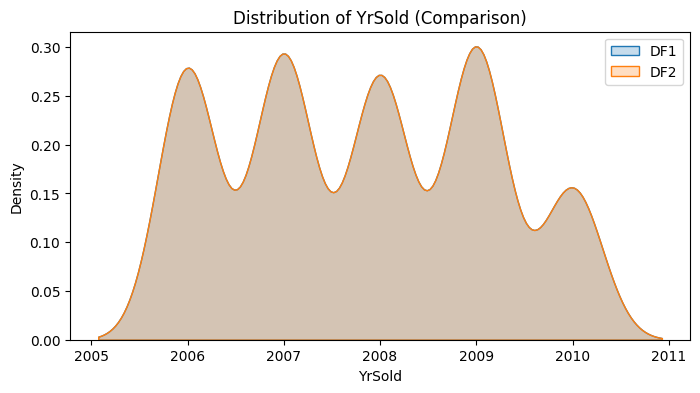

/tmp/ipython-input-1906149336.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df1[col], shade=True, label='DF1')
/tmp/ipython-input-1906149336.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df2[col], shade=True, label='DF2')


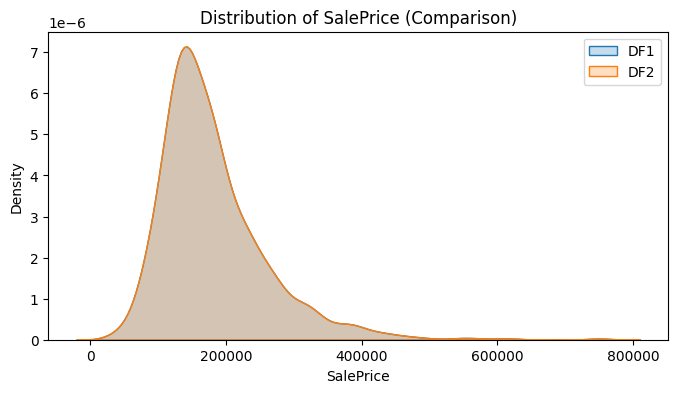

In [23]:
compare_kde_all_columns(df_num,new_df)

In [24]:
#check covariance ratio
def covariance_ratio(df1, df2):
  """
  Computes per-column variance ratio between two DataFrames.
  Returns a Series with column names as index.
  """
  common_cols = [col for col in df1.columns if col in df2.columns]
  cov_ratio = df1[common_cols].var() / df2[common_cols].var()
  return cov_ratio

In [25]:
ratio = covariance_ratio(df_num, new_df)
display(ratio)

,0
MSSubClass,1.000000
LotFrontage,1.215430
LotArea,1.000000
OverallQual,1.000000
OverallCond,1.000000
YearBuilt,1.000000
YearRemodAdd,1.000000
MasVnrArea,1.003709
BsmtFinSF1,1.000000
BsmtFinSF2,1.000000


In [26]:
coe1 = df_num.corr()
co2 = new_df.corr()
difference = coe1 - co2
display(difference)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,0.000000,-0.029629,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000637,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LotFrontage,-0.029629,0.000000,0.121573,0.016834,-0.005933,0.006664,0.005517,0.014989,0.019267,0.007436,...,0.012979,0.014959,0.000413,0.008084,0.003728,0.025348,0.003623,0.000749,0.001069,0.017028
LotArea,0.000000,0.121573,0.000000,0.000000,0.000000,0.000000,0.000000,0.000839,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OverallQual,0.000000,0.016834,0.000000,0.000000,0.000000,0.000000,0.000000,0.004624,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
OverallCond,0.000000,-0.005933,0.000000,0.000000,0.000000,0.000000,0.000000,-0.002408,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
YearBuilt,0.000000,0.006664,0.000000,0.000000,0.000000,0.000000,0.000000,0.004107,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
YearRemodAdd,0.000000,0.005517,0.000000,0.000000,0.000000,0.000000,0.000000,0.003089,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MasVnrArea,-0.000637,0.014989,0.000839,0.004624,-0.002408,0.004107,0.003089,0.000000,0.003480,-0.000989,...,-0.000272,0.003174,-0.000297,-0.000348,-0.000782,-0.000205,-0.000303,0.000758,0.000116,0.004879
BsmtFinSF1,0.000000,0.019267,0.000000,0.000000,0.000000,0.000000,0.000000,0.003480,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
BsmtFinSF2,0.000000,0.007436,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000989,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [27]:
def compare_boxplot_all_columns(df1, df2, df1_name='DF1', df2_name='DF2'):
    """
    Compare numeric columns between two dataframes using boxplots.

    Parameters:
    -----------
    df1, df2 : pandas DataFrames
        DataFrames to compare
    df1_name, df2_name : str
        Names to display for each dataset in the plots
    """
    # Method 1: Reset column names to avoid duplicate issues
    df1 = df1.copy()
    df2 = df2.copy()
    df1.columns = [f"{col}_{i}" if list(df1.columns).count(col) > 1 else col
                   for i, col in enumerate(df1.columns)]
    df2.columns = [f"{col}_{i}" if list(df2.columns).count(col) > 1 else col
                   for i, col in enumerate(df2.columns)]

    # Method 2: More direct duplicate removal
    # df1 = df1.loc[:, ~df1.columns.duplicated()]
    # df2 = df2.loc[:, ~df2.columns.duplicated()]

    # Find common numeric columns with broader dtype inclusion
    numeric_dtypes = ['int64', 'float64', 'int32', 'float32', 'int', 'float', 'uint8', 'uint16', 'uint32', 'uint64']

    df1_numeric = df1.select_dtypes(include=numeric_dtypes)
    df2_numeric = df2.select_dtypes(include=numeric_dtypes)

    common_cols = set(df1_numeric.columns).intersection(set(df2_numeric.columns))
    numeric_cols = list(common_cols)

    if len(numeric_cols) == 0:
        print("No common numeric columns found between the datasets.")
        print(f"{df1_name} numeric columns: {list(df1_numeric.columns)}")
        print(f"{df2_name} numeric columns: {list(df2_numeric.columns)}")
        return

    print(f"Comparing {len(numeric_cols)} common numeric columns...")

    for col in numeric_cols:
        plt.figure(figsize=(10, 6))

        # Create combined dataframe for boxplot
        data1 = df1[col].dropna().reset_index(drop=True)
        data2 = df2[col].dropna().reset_index(drop=True)

        combined = pd.concat([
            pd.DataFrame({col: data1, 'Dataset': df1_name}),
            pd.DataFrame({col: data2, 'Dataset': df2_name})
        ], ignore_index=True)

        # Create boxplot
        sns.boxplot(x='Dataset', y=col, data=combined)

        # Add some statistics to the title
        mean1 = data1.mean()
        mean2 = data2.mean()
        plt.title(f"Boxplot of {col}\n({df1_name}: mean={mean1:.2f}, {df2_name}: mean={mean2:.2f})")

        # Optional: Add swarm plot for data points visualization
        # sns.swarmplot(x='Dataset', y=col, data=combined, color='black', alpha=0.3, size=2)

        plt.tight_layout()
        plt.show()

Comparing 37 common numeric columns...


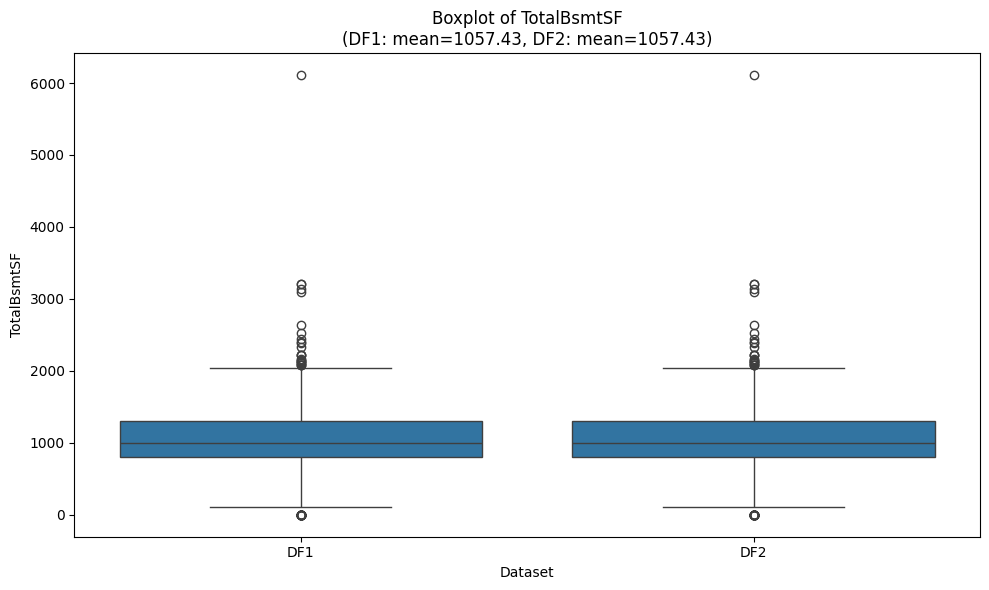

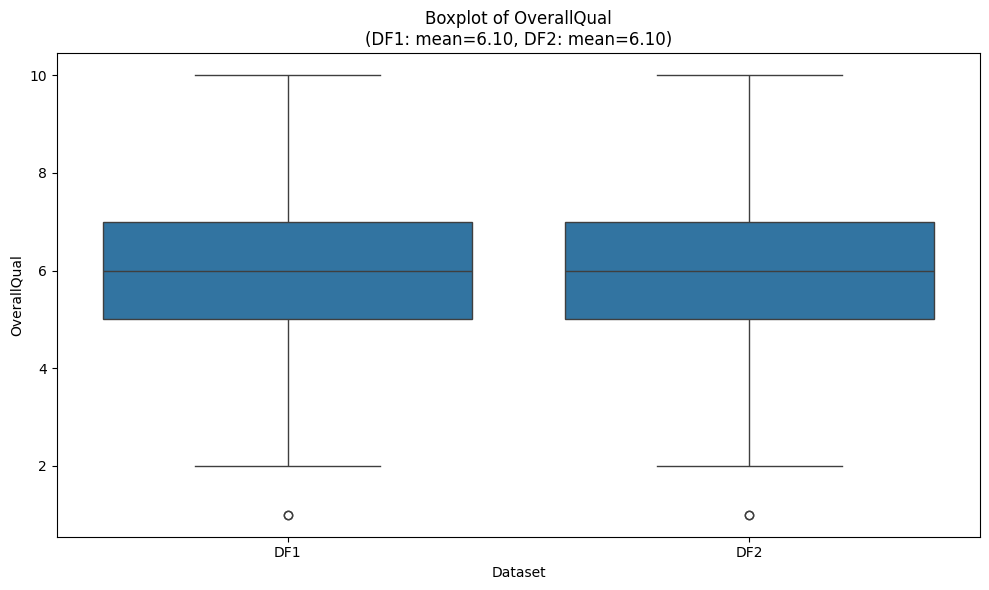

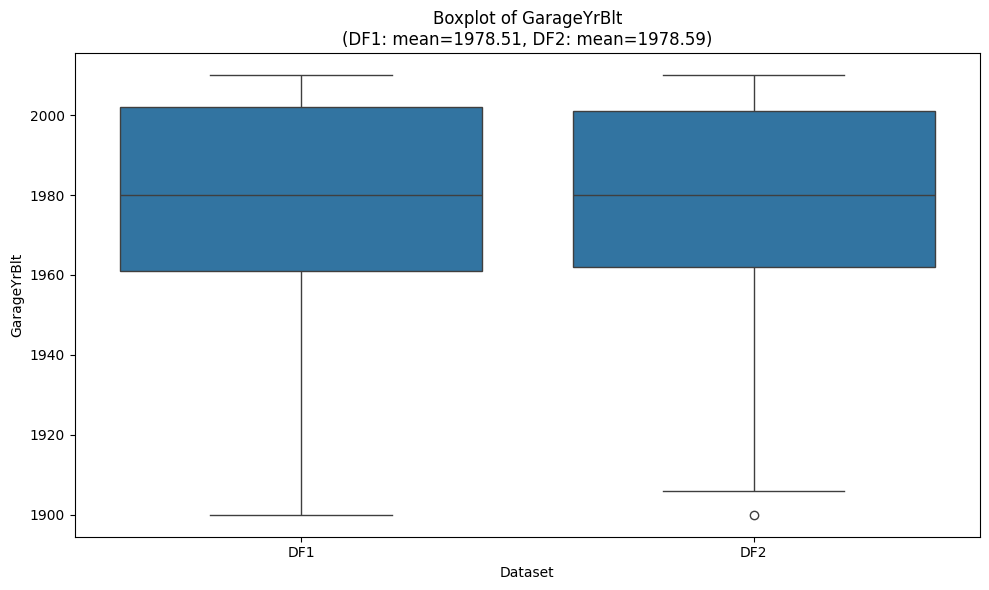

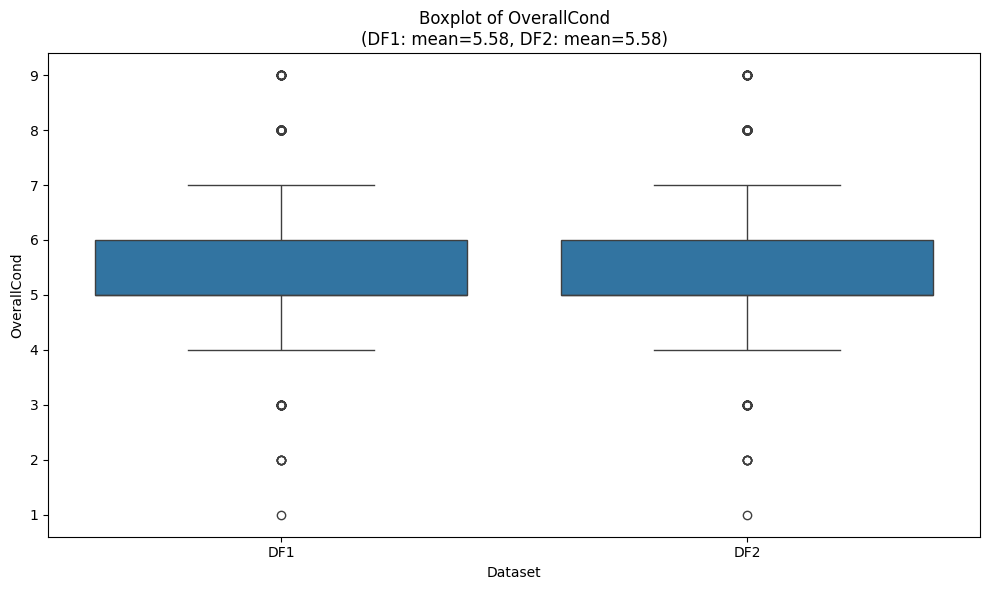

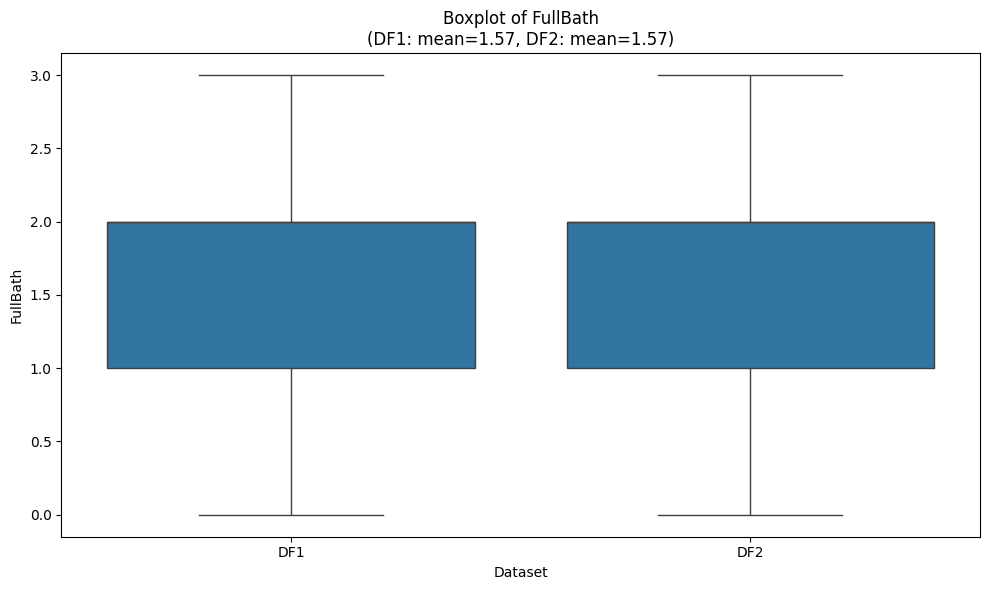

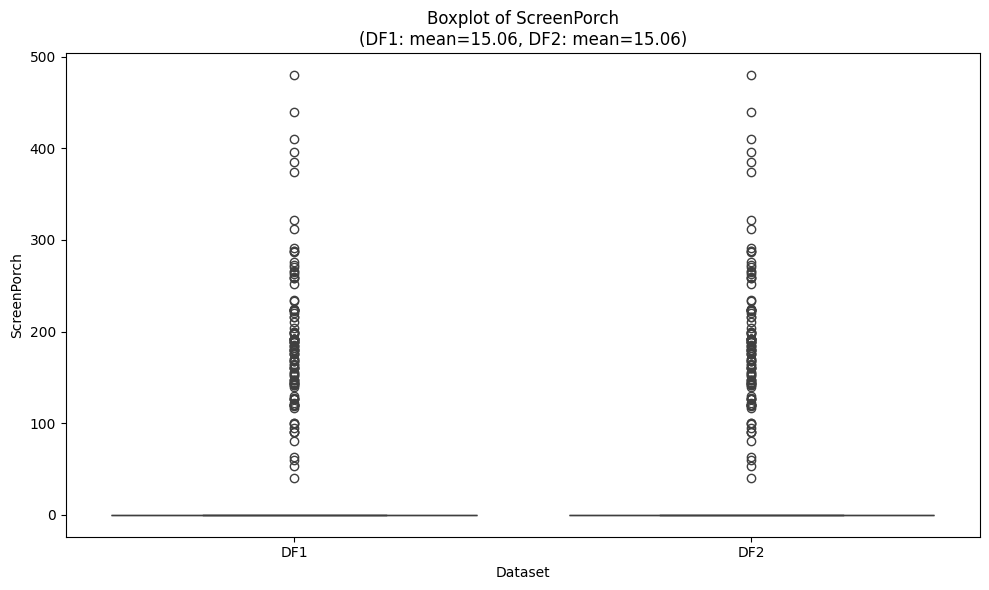

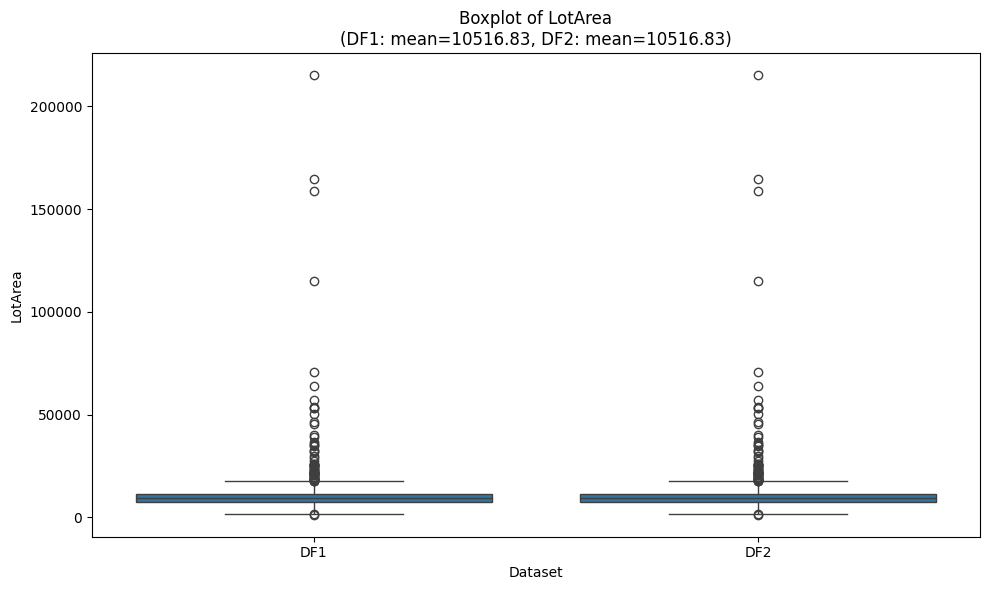

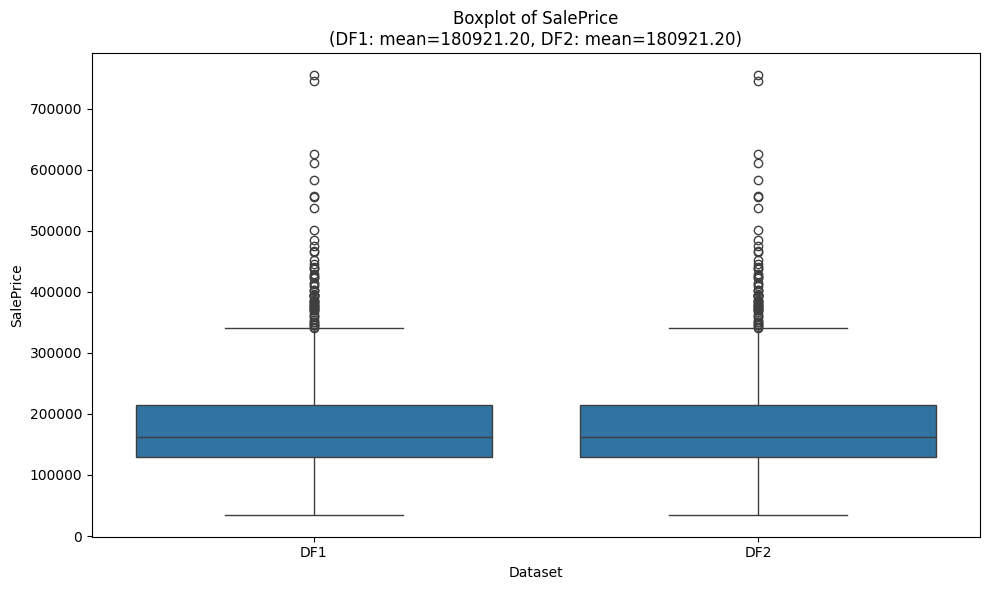

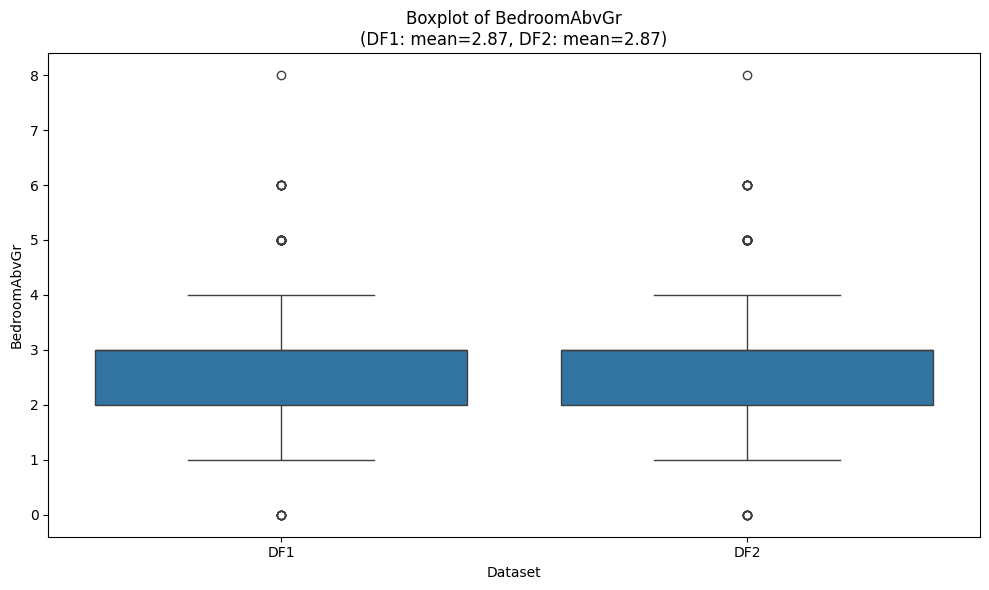

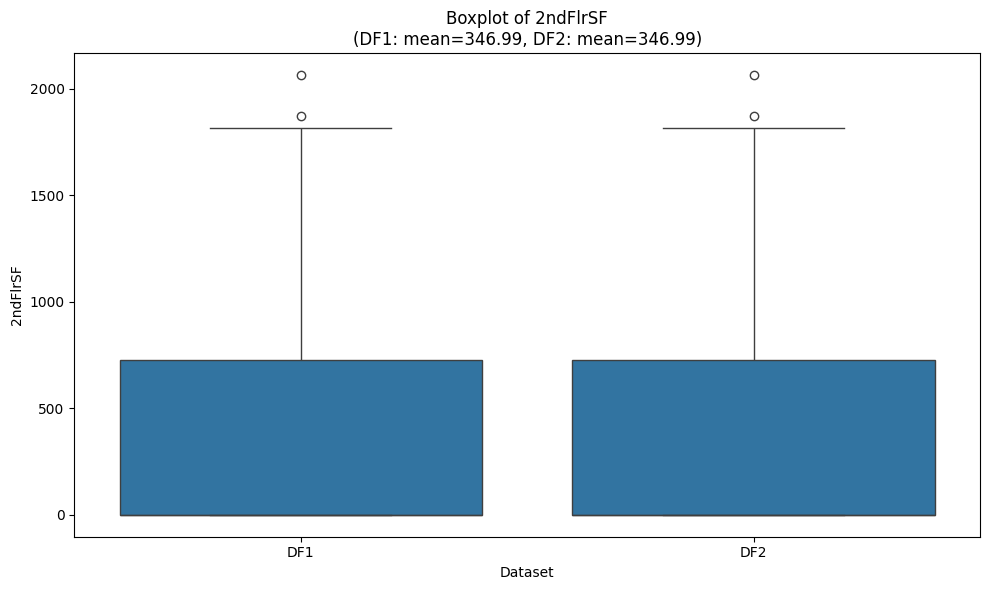

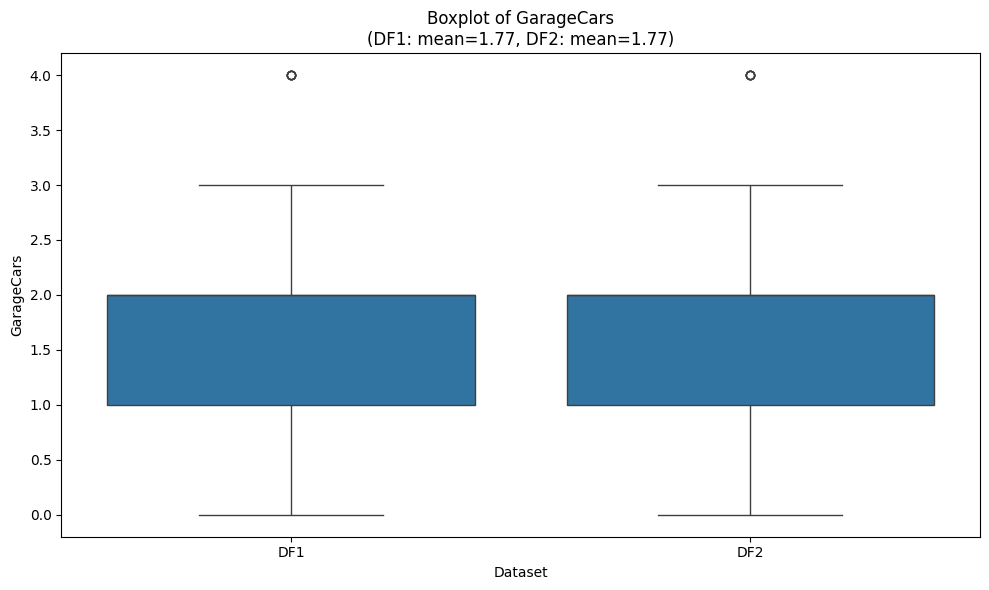

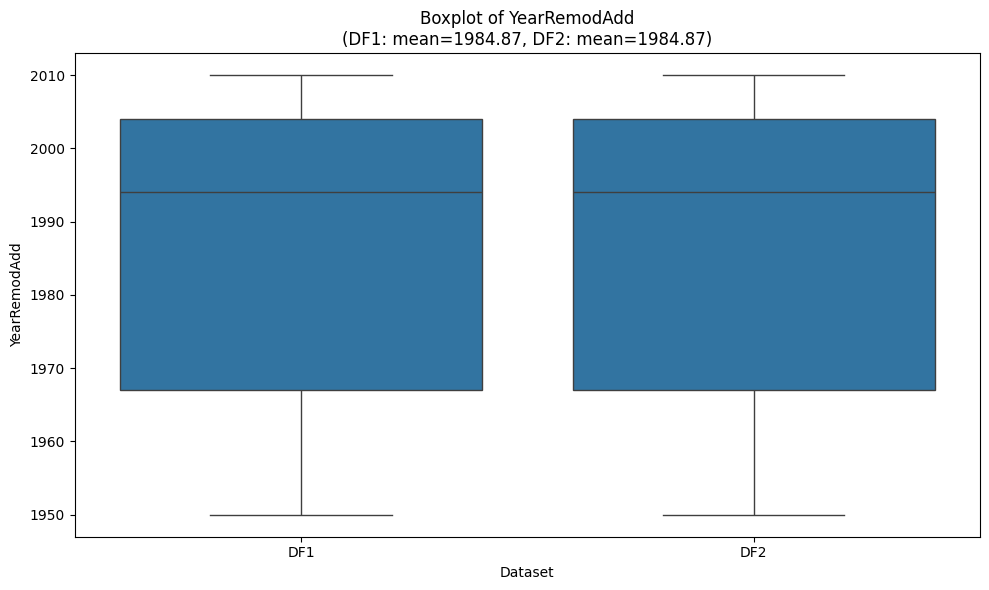

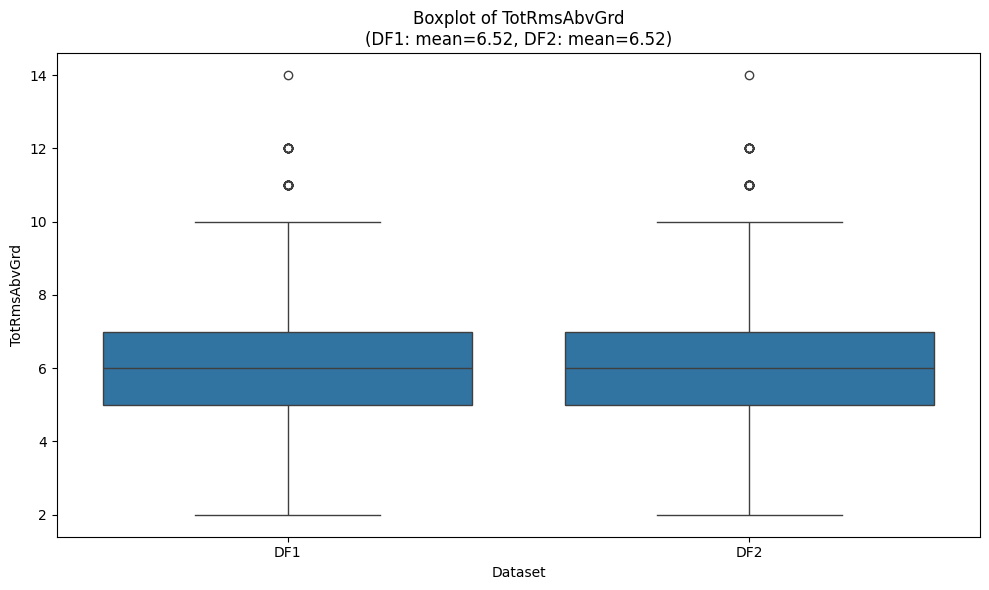

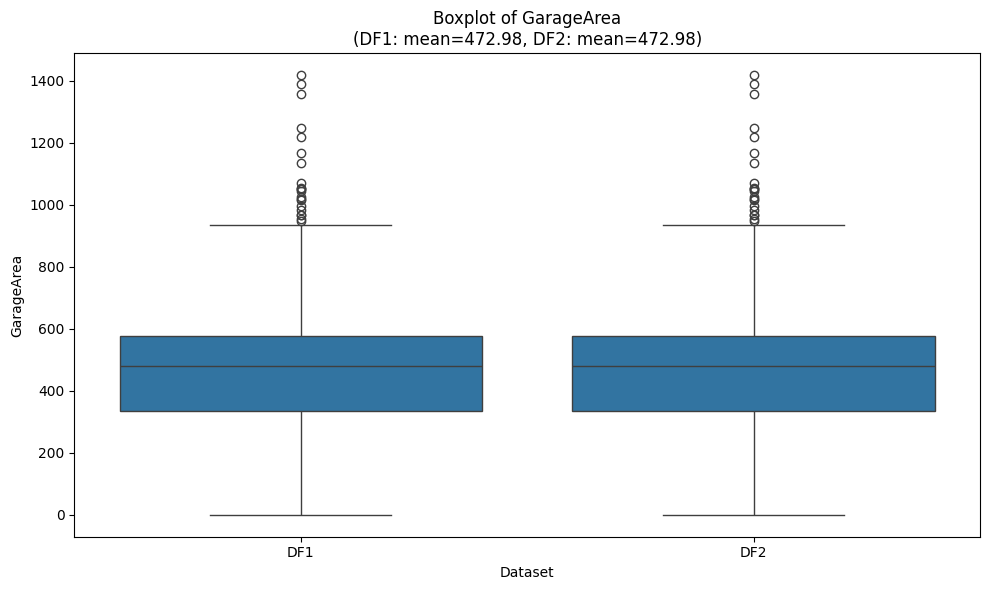

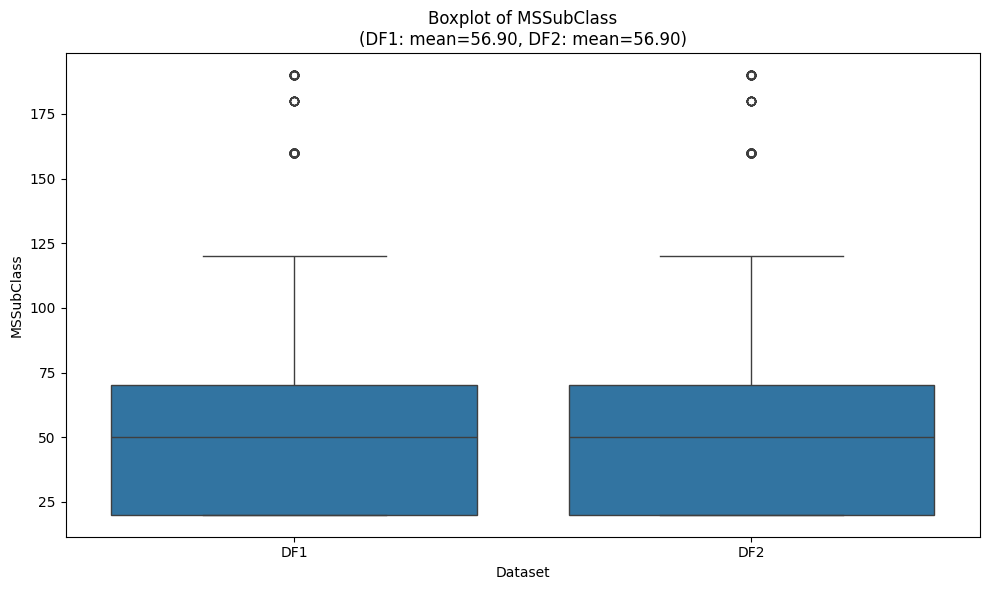

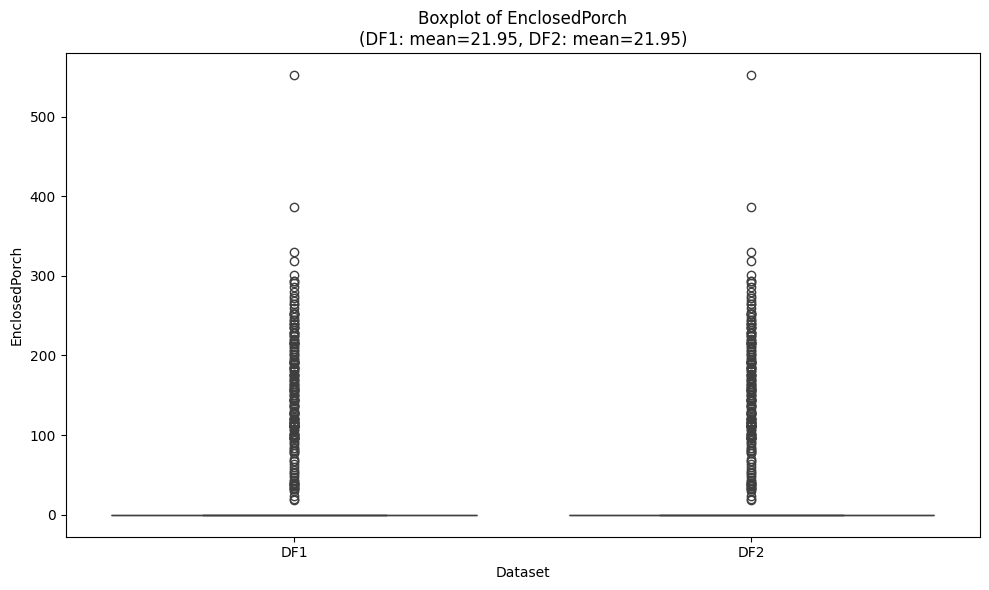

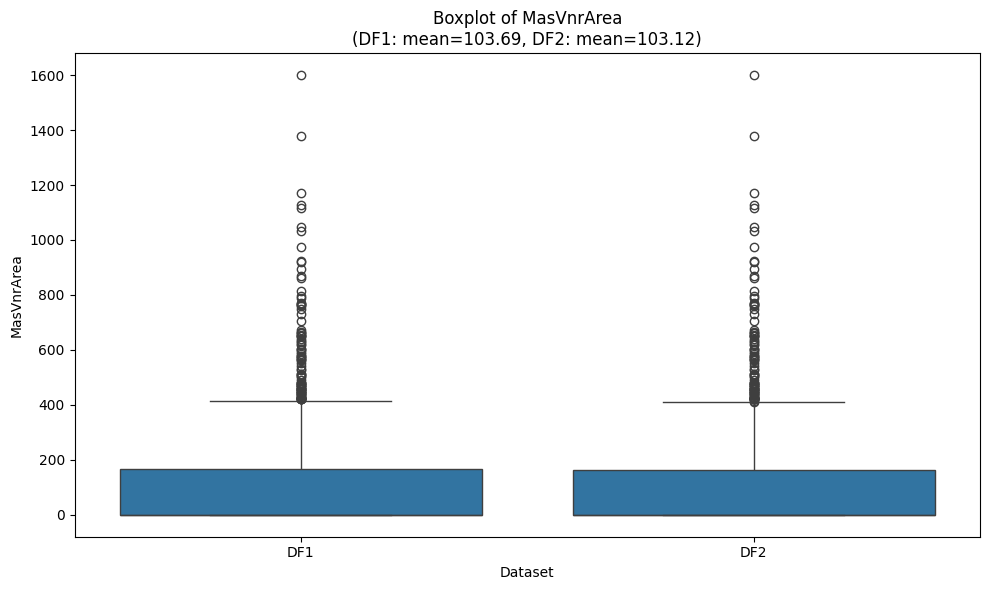

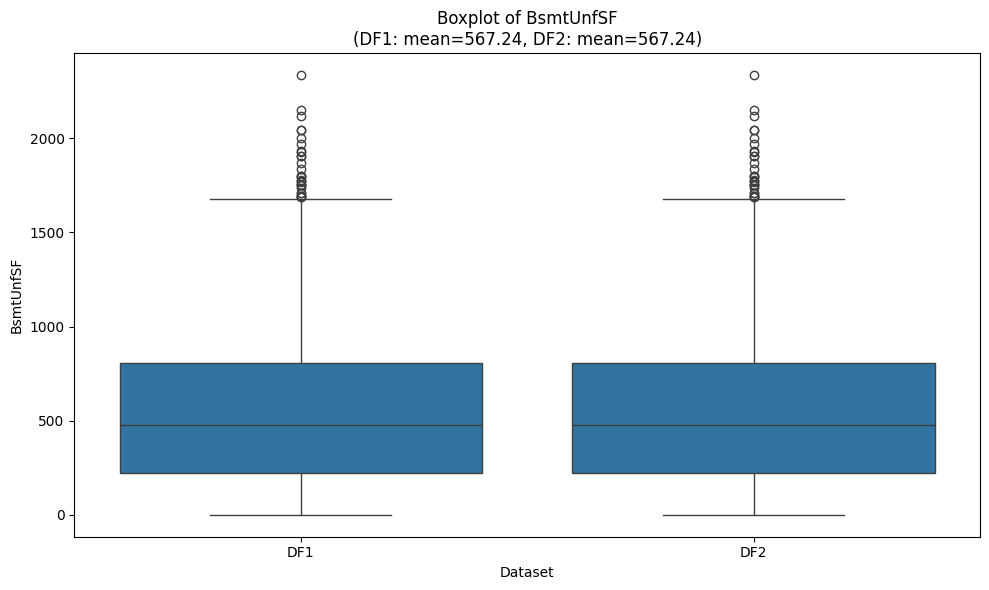

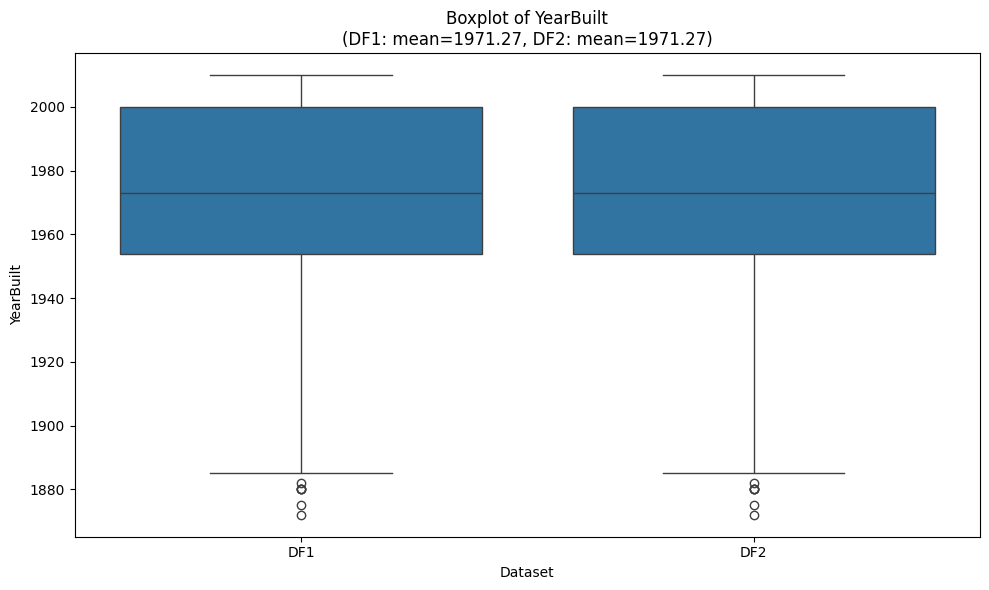

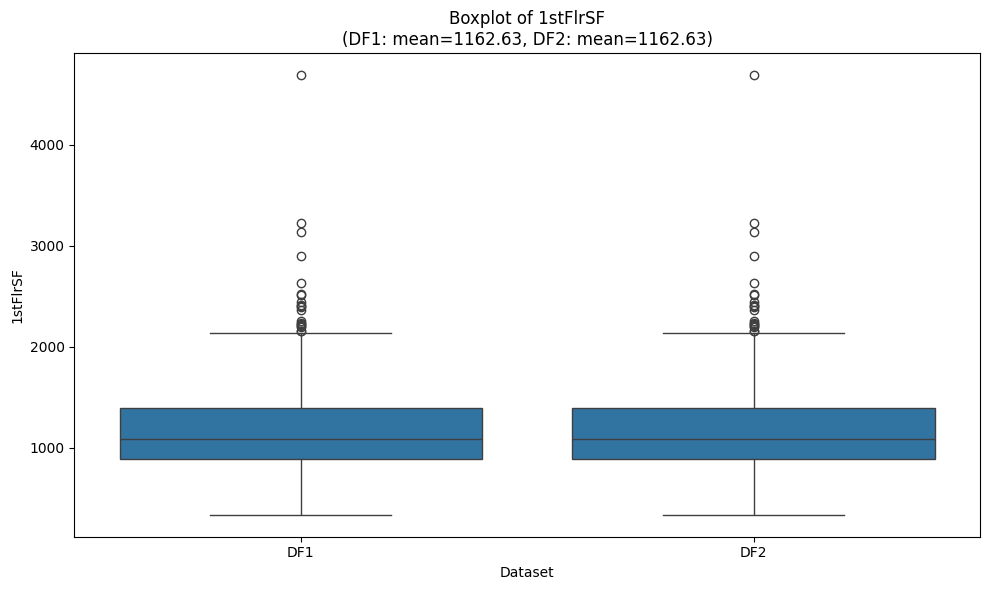

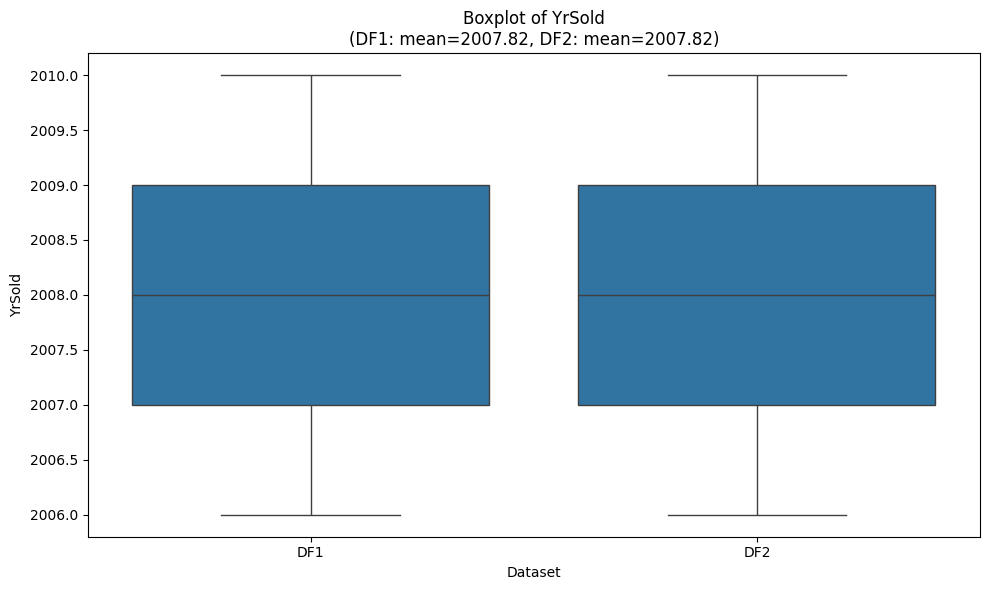

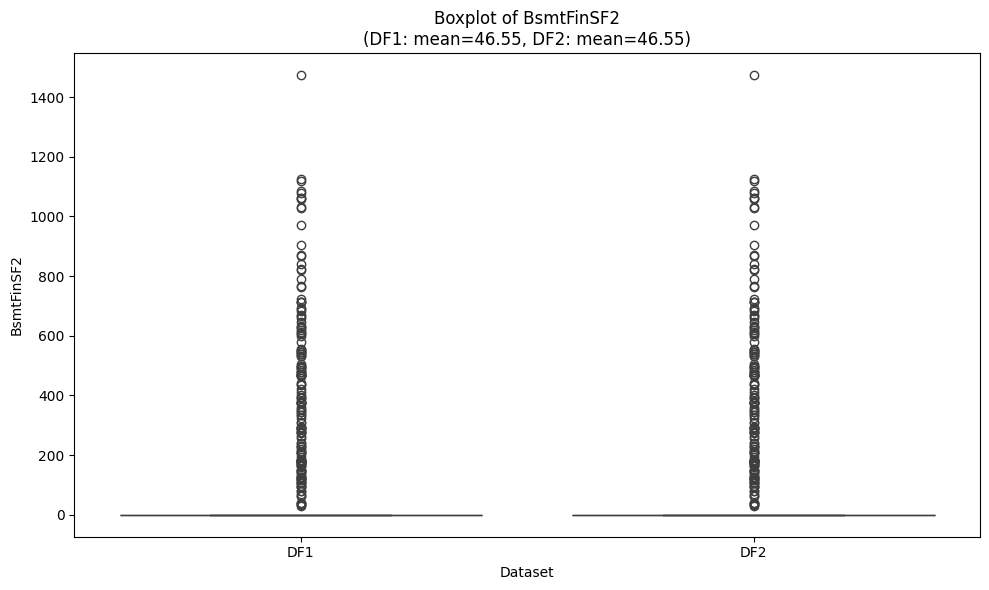

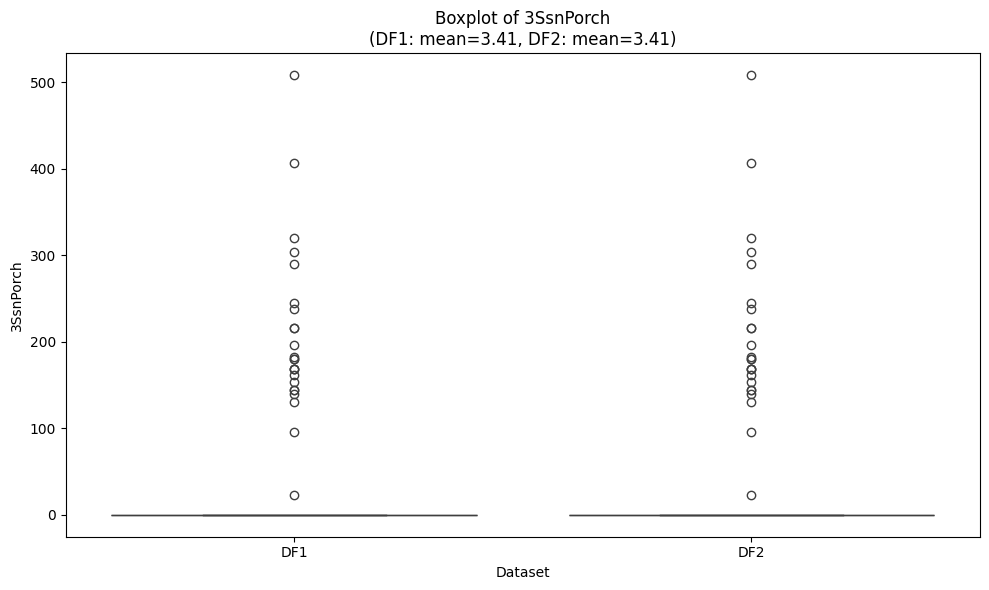

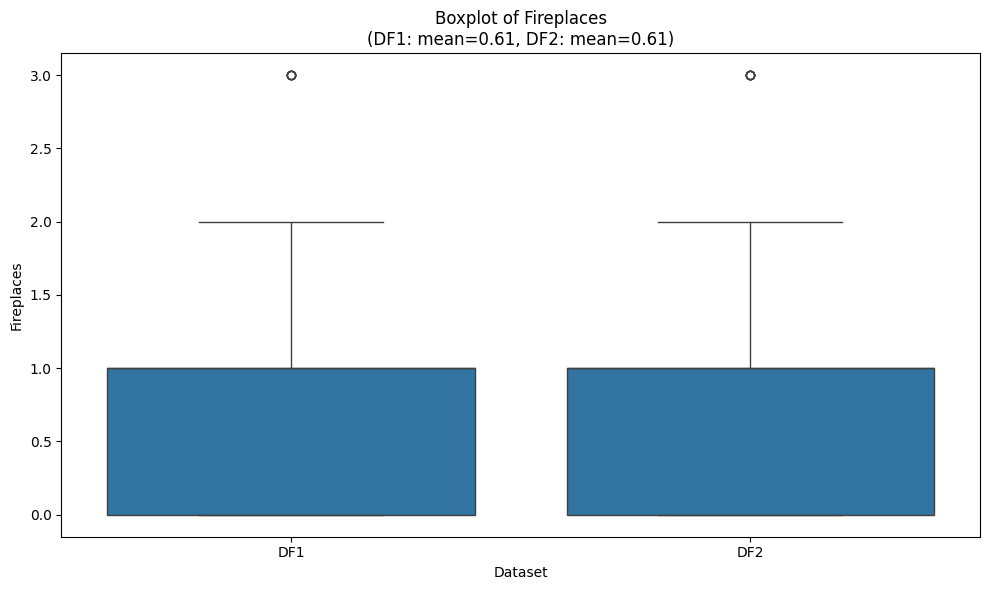

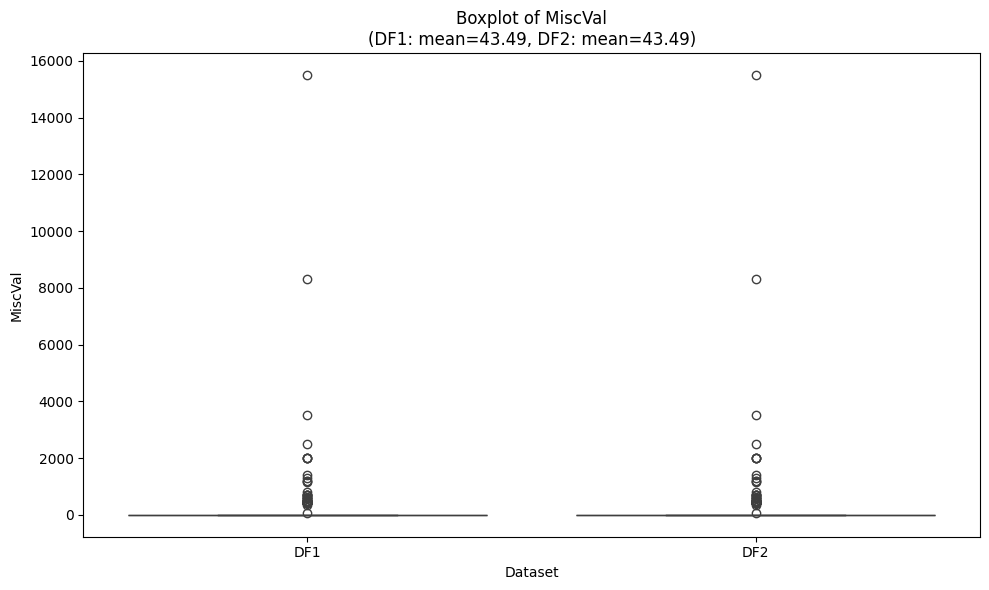

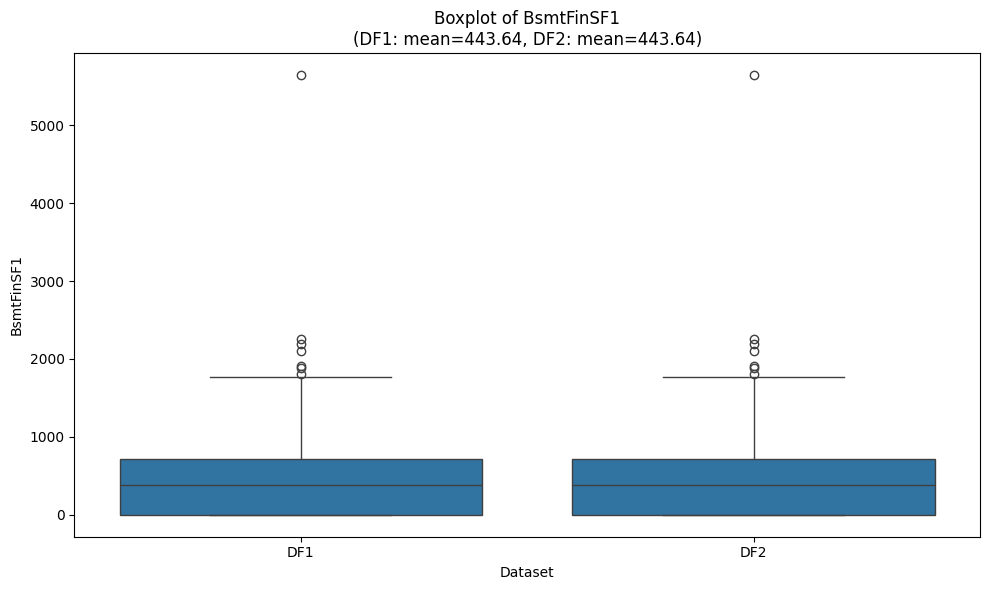

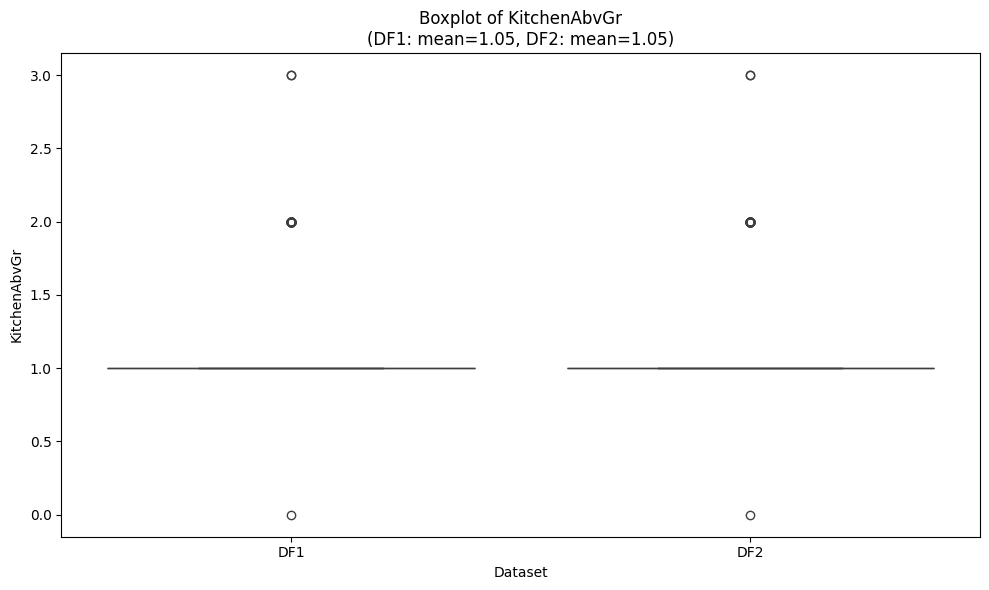

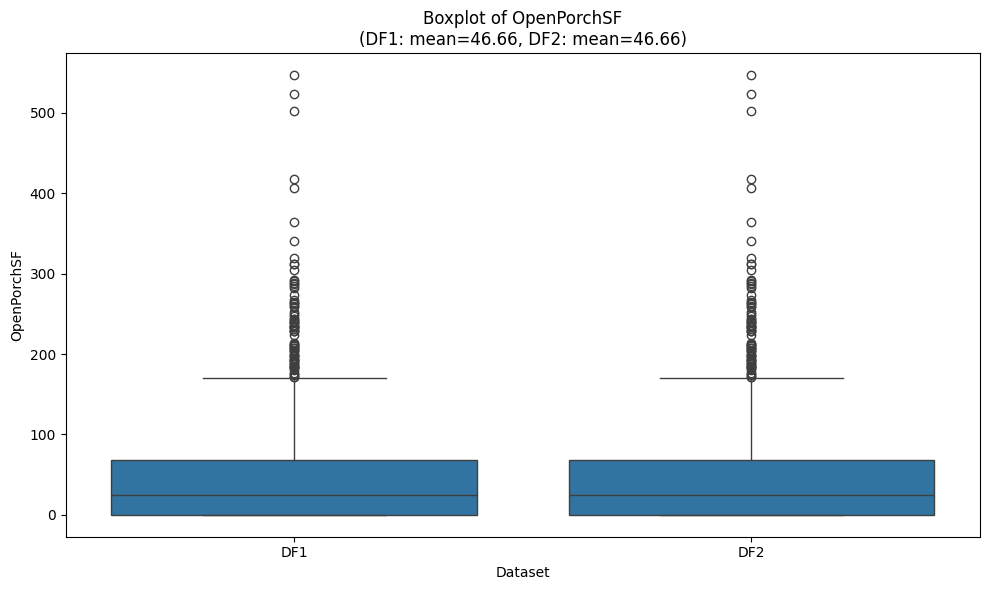

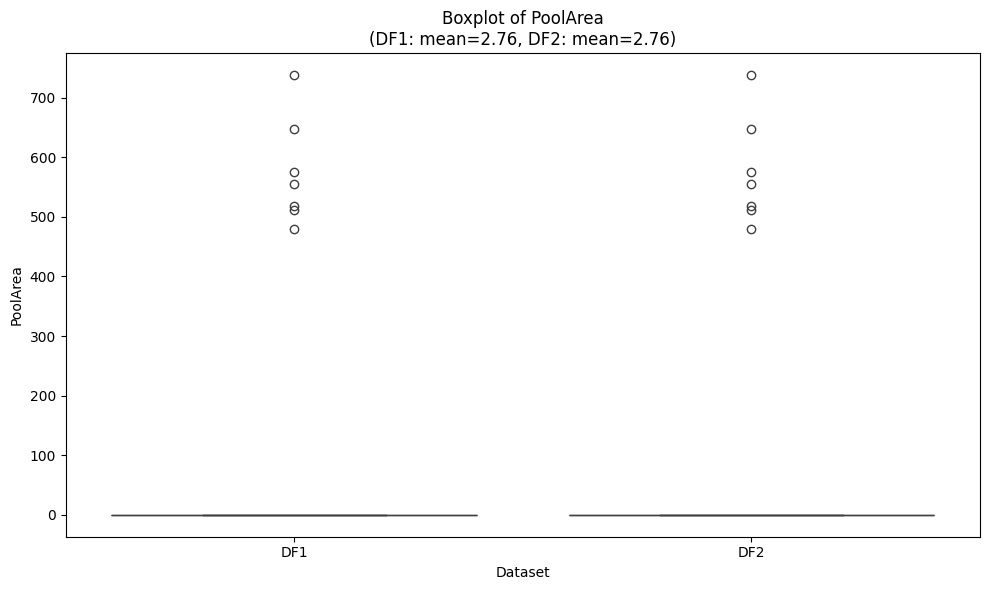

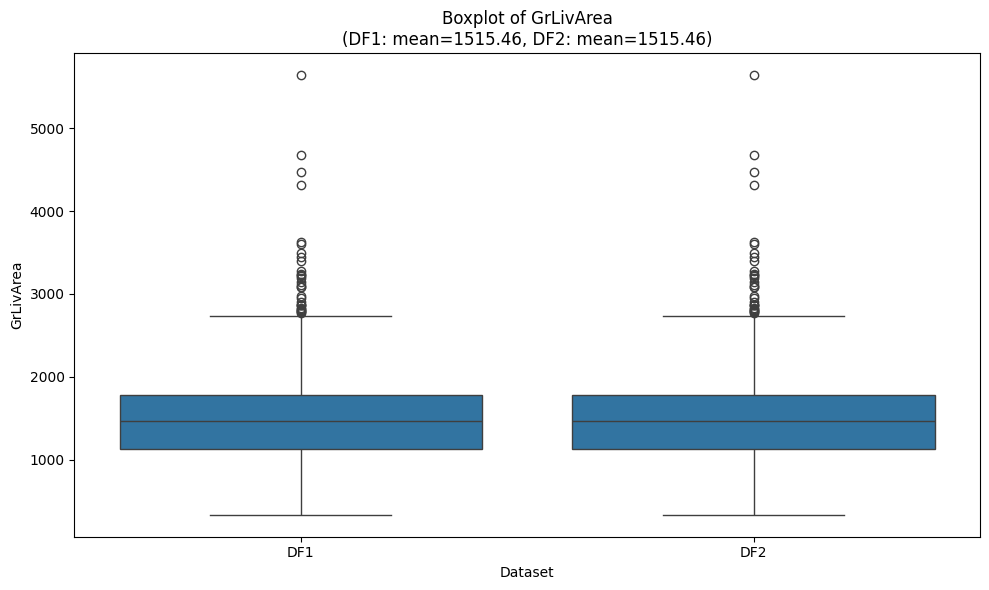

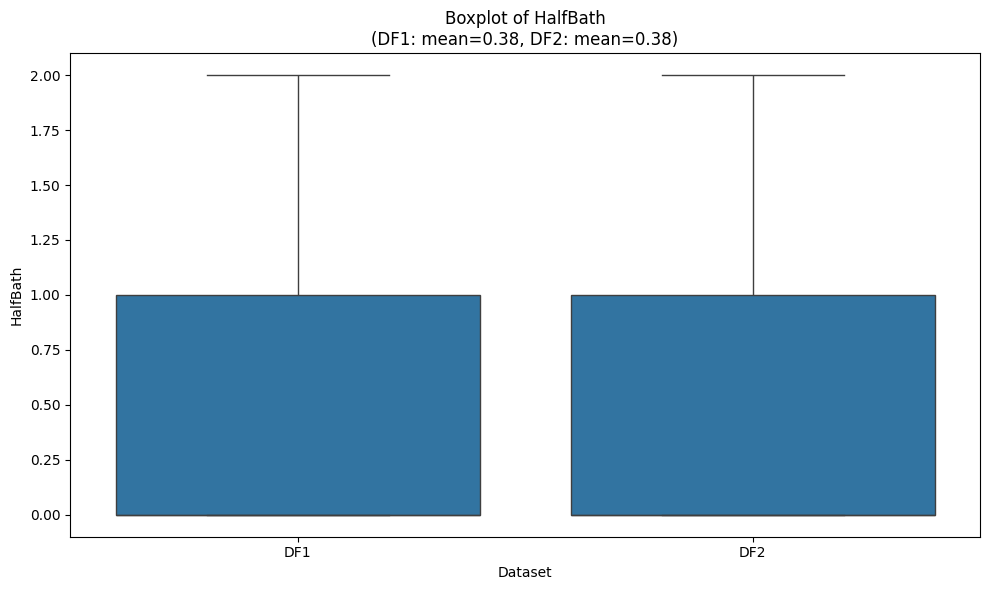

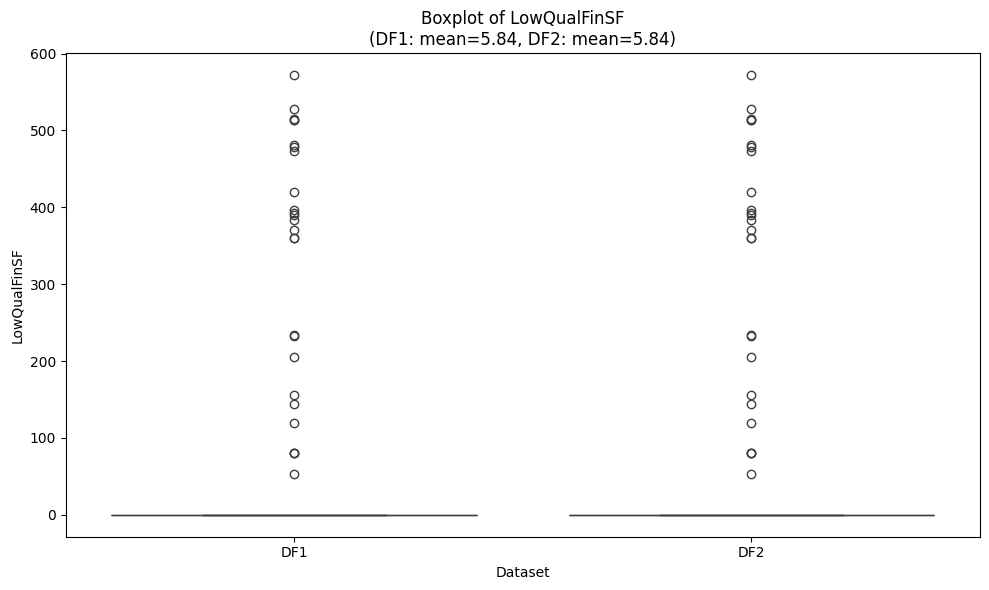

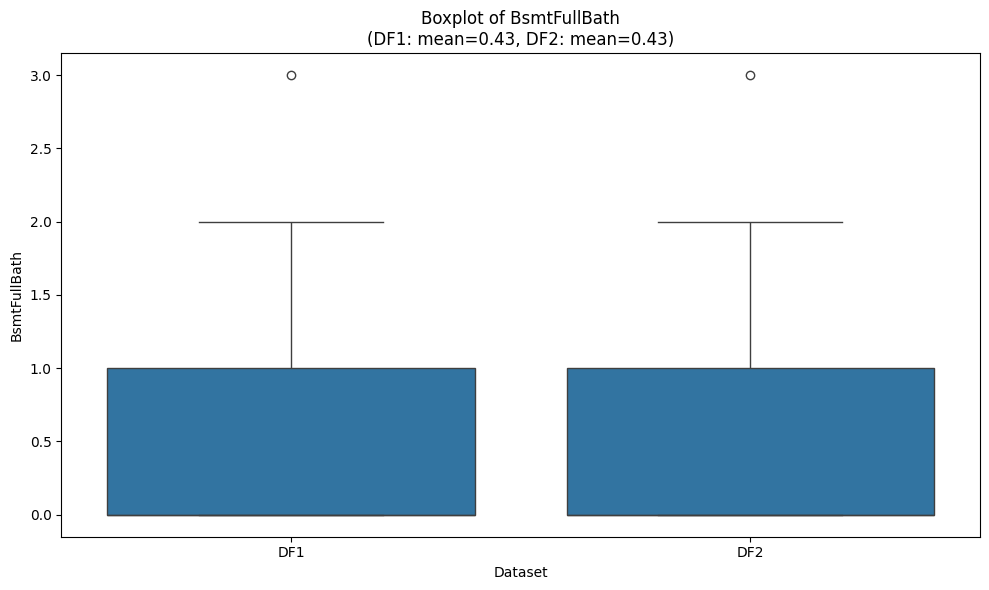

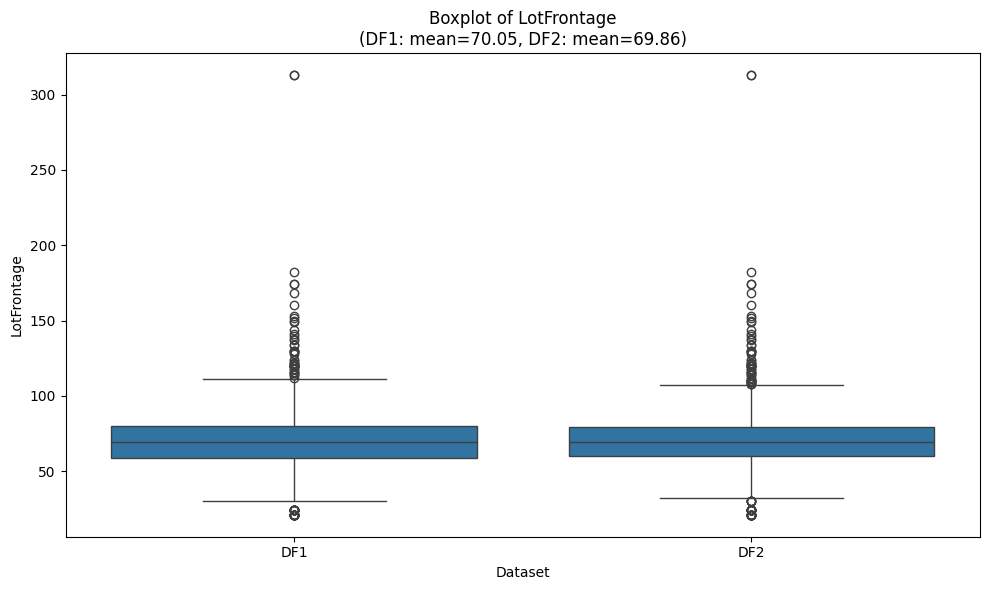

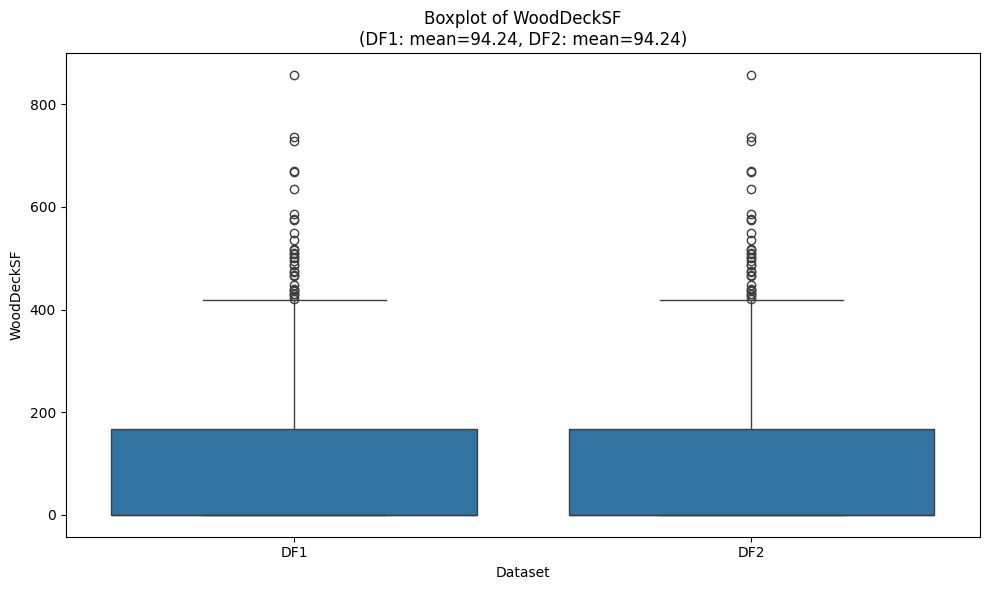

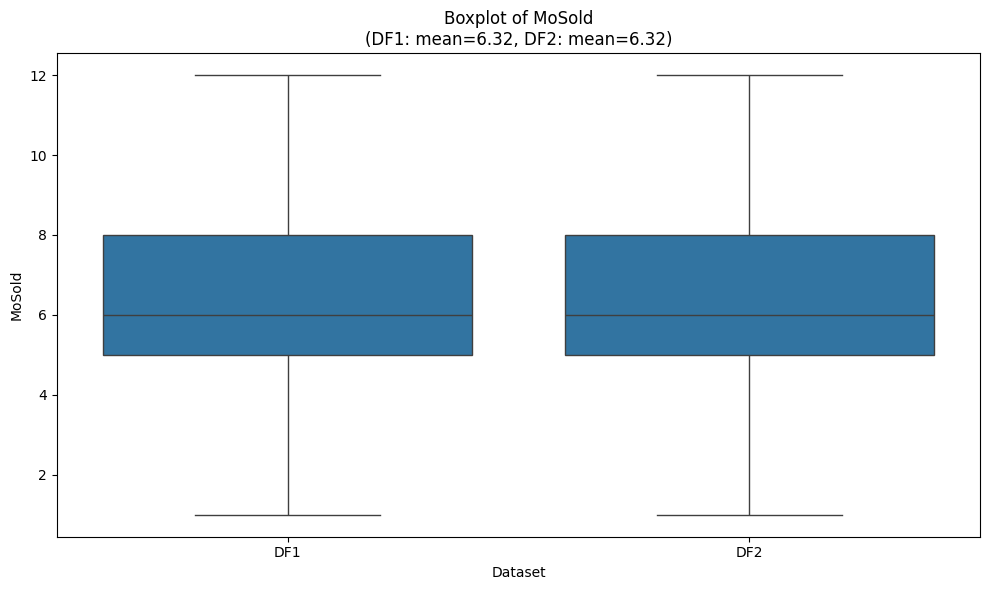

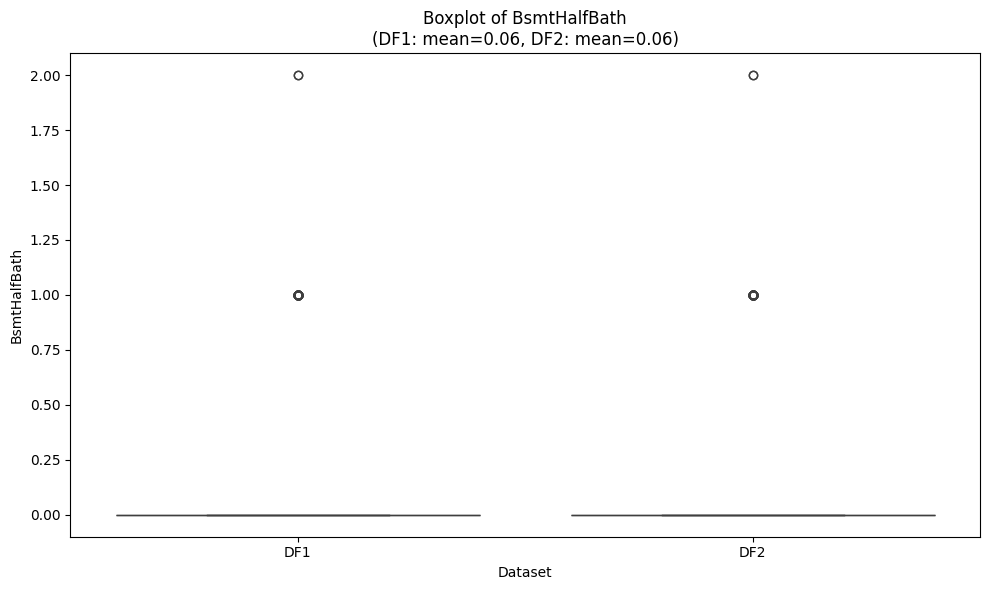

In [28]:
compare_boxplot_all_columns(df_num,new_df)

In [29]:
def print_cat_column(df):
  numeric=[]
  for column in df.columns:
    if df[column].dtype == "object":
      numeric.append(column)
  return numeric

In [30]:
cat_columns = print_cat_column(df)
df_cat = df[cat_columns].copy()
display(df_cat.head())

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [31]:
def replace_with_mode(df):
  for columns in df.columns:
    if df[columns].dtype == "object":
      mode_value = df[columns].mode()[0]
      df[columns].fillna(mode_value,inplace=True)
  return df

In [32]:
df_new2 = df_cat.copy()
df_new2 = replace_with_mode(df_new2)
print(df_new2.isna().sum())

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64


/tmp/ipython-input-3266889302.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[columns].fillna(mode_value,inplace=True)


In [33]:
def replace_missing(df):
    df = df.copy()

    for column in df.columns:
        if df[column].dtype == 'object':
            mode_value = df[column].mode()[0]
            df[column].fillna(mode_value, inplace=True)
        else:
            median_value = df[column].median()
            df[column].fillna(median_value, inplace=True)

    return df


In [34]:
df = replace_missing(df)

/tmp/ipython-input-2797157017.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_value, inplace=True)
/tmp/ipython-input-2797157017.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [35]:
! pip install xgboost

In [36]:
from xgboost import XGBRegressor

In [37]:
X = df.drop('SalePrice',axis=1)
y = df["SalePrice"]

In [40]:
X.shape
y.shape

(1460,)

,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [47]:
from sklearn.preprocessing import LabelEncoder

In [49]:
label_encoders = {}
for column in X.columns:
    if X[column].dtype == "object":
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        label_encoders[column] = le


In [50]:
X.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,0,3,3,0,4,...,0,0,2,2,2,0,2,2008,8,4
1,20,3,80.0,9600,1,0,3,3,0,2,...,0,0,2,2,2,0,5,2007,8,4
2,60,3,68.0,11250,1,0,0,3,0,4,...,0,0,2,2,2,0,9,2008,8,4
3,70,3,60.0,9550,1,0,0,3,0,0,...,0,0,2,2,2,0,2,2006,8,0
4,60,3,84.0,14260,1,0,0,3,0,2,...,0,0,2,2,2,0,12,2008,8,4
5,50,3,85.0,14115,1,0,0,3,0,4,...,0,0,2,2,2,700,10,2009,8,4
6,20,3,75.0,10084,1,0,3,3,0,4,...,0,0,2,2,2,0,8,2007,8,4
7,60,3,69.0,10382,1,0,0,3,0,0,...,0,0,2,2,2,350,11,2009,8,4
8,50,4,51.0,6120,1,0,3,3,0,4,...,0,0,2,2,2,0,4,2008,8,0
9,190,3,50.0,7420,1,0,3,3,0,0,...,0,0,2,2,2,0,1,2008,8,4


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [52]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [54]:
xg = XGBRegressor()
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [55]:
y_pred = xg.predict(X_test)

In [58]:
print(r2_score(y_test,y_pred))

0.9110156297683716


In [59]:
X = df.drop('SalePrice',axis=1)
y = df["SalePrice"]

In [60]:
from google.colab import files
files.upload()

Saving test.csv to test.csv


{'test.csv': b'Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition\n1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA

In [119]:
X_test1 = pd.read_csv("/content/test.csv")
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>


In [120]:
def replace_missing(df):
    df = df.copy()

    for column in df.columns:
        if df[column].dtype == 'object':
            mode_value = df[column].mode()[0]
            df[column].fillna(mode_value, inplace=True)
        else:
            median_value = df[column].median()
            df[column].fillna(median_value, inplace=True)

    return df

In [121]:
X_test = replace_missing(X_test)
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>


/tmp/ipython-input-2243254334.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_value, inplace=True)


In [123]:
X_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,0,3,3,0,4,...,120,0,0,2,2,0,6,2010,8,4
1,20,3,81.0,14267,1,0,0,3,0,0,...,0,0,0,2,0,12500,6,2010,8,4
2,60,3,74.0,13830,1,0,0,3,0,4,...,0,0,0,2,2,0,3,2010,8,4
3,60,3,78.0,9978,1,0,0,3,0,4,...,0,0,0,2,2,0,6,2010,8,4
4,120,3,43.0,5005,1,0,0,1,0,4,...,144,0,0,2,2,0,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,4,21.0,1936,1,0,3,3,0,4,...,0,0,0,2,2,0,6,2006,8,4
1455,160,4,21.0,1894,1,0,3,3,0,4,...,0,0,0,2,2,0,4,2006,8,0
1456,20,3,160.0,20000,1,0,3,3,0,4,...,0,0,0,2,2,0,9,2006,8,0
1457,85,3,62.0,10441,1,0,3,3,0,4,...,0,0,0,2,2,700,7,2006,8,4


In [124]:
label_encoders = {}
for column in X_test.columns:
  if X_test[column].dtype == "object":
    le = LabelEncoder()
    X_test[column] = le.fit_transform(X_test[column])
    label_encoders[column] = le


In [125]:
X_test = X_test.drop('Id',axis=1)

KeyError: "['Id'] not found in axis"

In [126]:
from sklearn.preprocessing import  StandardScaler
from sklearn.compose import ColumnTransformer

In [127]:
numerical_cols = print_numeric_column(X_test)
preprocessor = ColumnTransformer(
    transformers = [
        ('num',StandardScaler(), numerical_cols)
    ],
    remainder = 'passthrough'
)

In [128]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('preprocess',preprocessor),
    ('model',XGBRegressor(n_estiators=500,learning_rate = 0.05, max_depth=6, random_state=42))
])

In [129]:
pipeline.fit(X_test)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [06:50:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "n_estiators" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoostError: [06:50:57] /workspace/src/objective/init_estimation.h:22: Check failed: info.labels.Shape(0) == info.num_row_ (0 vs. 1459) : Invalid shape of labels.
Stack trace:
  [bt] (0) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x2bdf8c) [0x7c03942bdf8c]
  [bt] (1) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x78af86) [0x7c039478af86]
  [bt] (2) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x6f5045) [0x7c03946f5045]
  [bt] (3) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(XGBoosterUpdateOneIter+0x77) [0x7c03941caa67]
  [bt] (4) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7c03e5958e2e]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7c03e5955493]
  [bt] (6) /usr/lib/python3.12/lib-dynload/_ctypes.cpython-312-x86_64-linux-gnu.so(+0x98c1) [0x7c03e6bd88c1]
  [bt] (7) /usr/lib/python3.12/lib-dynload/_ctypes.cpython-312-x86_64-linux-gnu.so(+0x8ffe) [0x7c03e6bd7ffe]
  [bt] (8) /usr/bin/python3(_PyObject_MakeTpCall+0x2fb) [0x53f5db]

